In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('ggplot')

# import plotly
# import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#### Loading Dataset 
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [3]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
# matches_df = matches[['id', 'Season', 'city', 'date','toss_winner',
#        'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
#        'win_by_wickets', 'player_of_match', 'venue']]

# df = matches_df.merge(deliveries,left_on = 'id',right_on = 'match_id',how = 'left')

# temp = data.copy()
# ## Current Playing Teams (Till 2021 IPL Season)
# teams = [
#     'Sunrisers Hyderabad',
#     'Mumbai Indians',
#     'Royal Challengers Bangalore',
#     'Kolkata Knight Riders',
#     'Kings XI Punjab',
#     'Chennai Super Kings',
#     'Rajasthan Royals',
#     'Delhi Capitals'
# ]

# ## Replacing Old Team Names With New One's
# temp['batting_team'] = temp['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
# temp['bowling_team'] = temp['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


# temp['batting_team'] = temp['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
# temp['bowling_team'] = temp['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

# ## Removing All The Teams That Doesn't Play Now
# temp = temp[(temp['bowling_team'].isin(teams)) & (temp['batting_team'].isin(teams))]

# df = temp

Cleaning Matches Dataframe To Remain Only Teams That Play Now

In [7]:
temp = matches.copy()
## Current Playing Teams (Till 2021 IPL Season)
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

## Replacing Old Team Names With New One's
temp['team1'] = temp['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
temp['team2'] = temp['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
temp['toss_winner'] = temp['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
temp['winner'] = temp['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


temp['team1'] = temp['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
temp['team2'] = temp['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
temp['toss_winner'] = temp['toss_winner'].str.replace('Delhi Daredevils','Delhi Capitals')
temp['winner'] = temp['winner'].str.replace('Delhi Daredevils','Delhi Capitals')



## Removing All The Teams That Doesn't Play Now
temp = temp[(temp['team1'].isin(teams)) & (temp['team2'].isin(teams)) & (temp['toss_winner'].isin(teams)) & (temp['winner'].isin(teams))]

In [8]:
temp.team1.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [9]:
temp.winner.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Kings XI Punjab', 'Kolkata Knight Riders',
       'Delhi Capitals', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [10]:
temp.toss_winner.unique()

array(['Royal Challengers Bangalore', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [11]:
matches_lt = temp

In [12]:
matches_lt.shape

(638, 18)

### 1) Matches Per Season

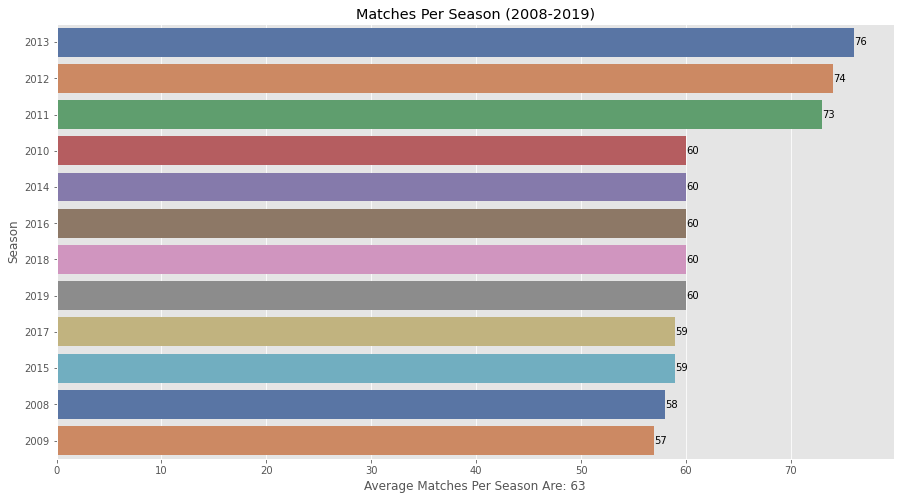

In [13]:
season = matches['Season'].apply(lambda x:x.split('-')[1]).astype(int)
plt.figure(figsize=(15,8))
ax = sns.countplot(y = season,palette='deep',order=season.value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Matches Per Season (2008-2019)')
plt.xlabel(f'Average Matches Per Season Are: {int(season.value_counts().mean())}')
plt.show();

### 2) Most Man of The Match Award Received By Players

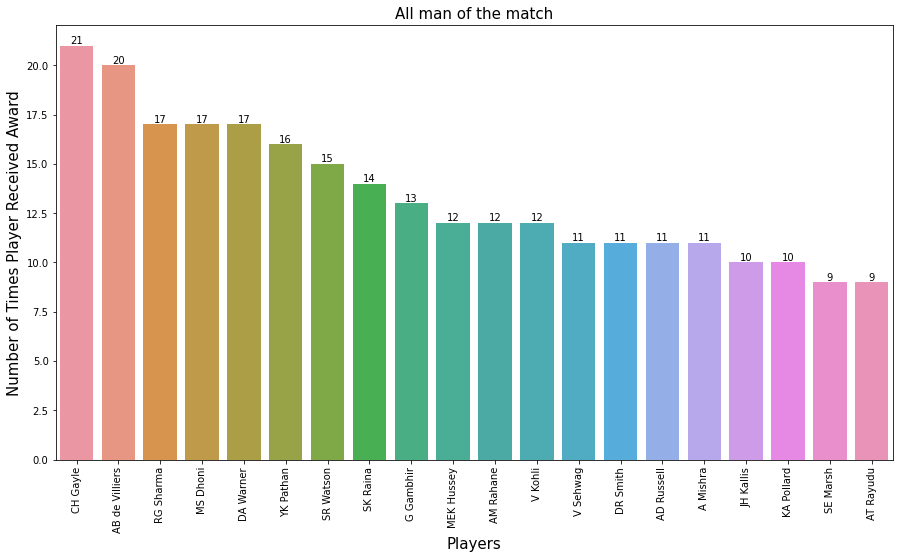

In [14]:
plt.figure(figsize=(15,8))
plt.style.use('default')
ax = sns.countplot('player_of_match', data=matches,order=matches['player_of_match'].value_counts().iloc[:20].index)
ax.bar_label(ax.containers[0])
font = {"size":15}
plt.xticks(rotation='vertical')
plt.title("All man of the match",fontdict=font)
plt.xlabel("Players",fontdict=font)
plt.ylabel("Number of Times Player Received Award",fontdict=font)
plt.show();

### 3) Venues With Most Matches

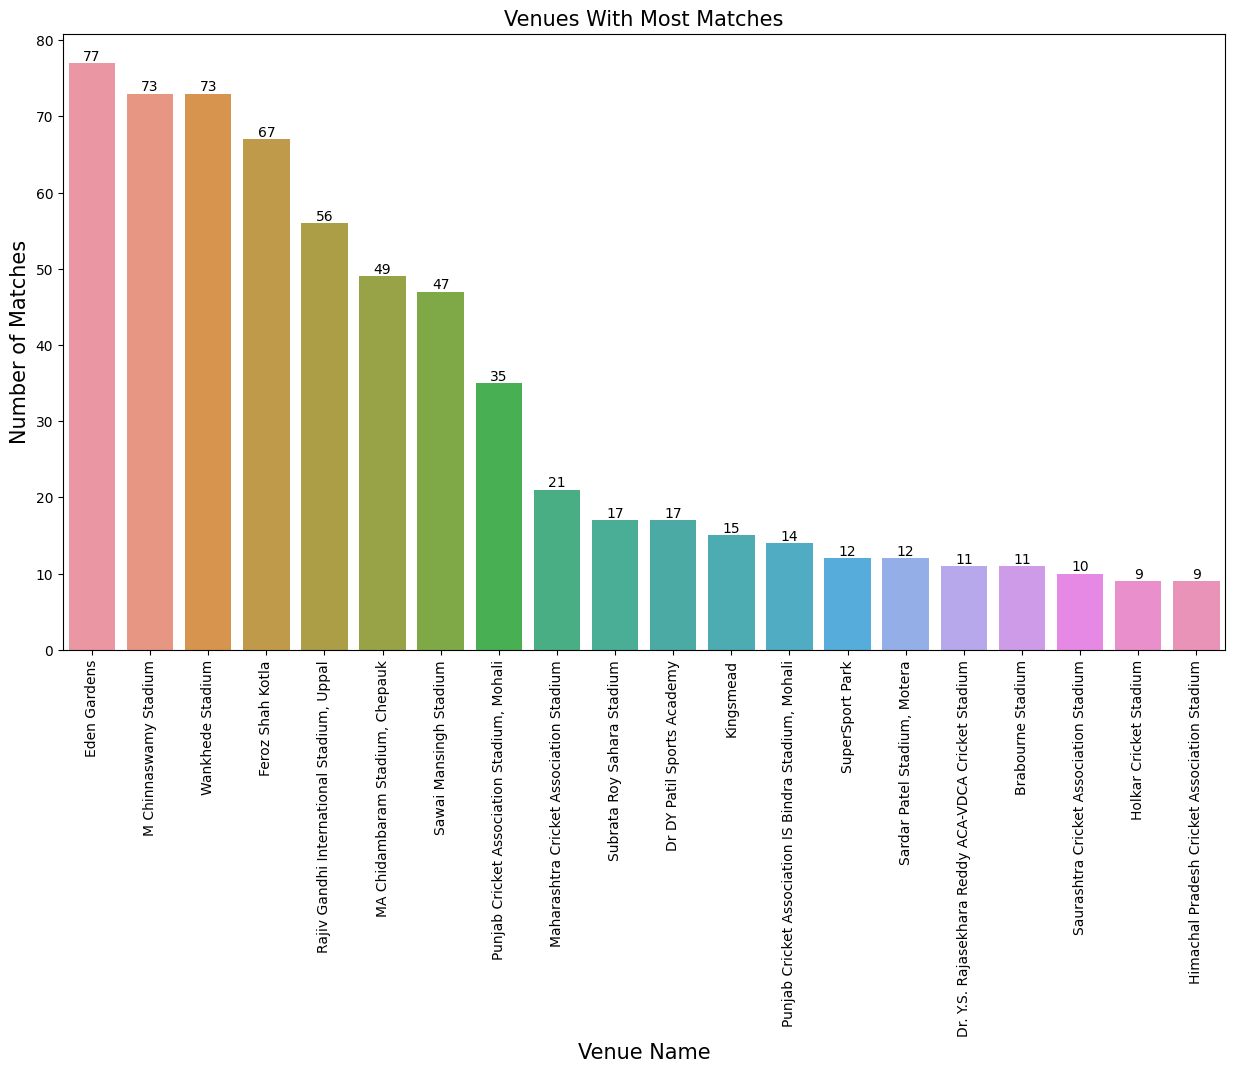

In [15]:
plt.figure(figsize=(15,8))
plt.style.use('default')
ax = sns.countplot('venue', data=matches,order=matches['venue'].value_counts().iloc[:20].index)
ax.bar_label(ax.containers[0])
font = {"size":15}
plt.xticks(rotation='vertical')
plt.title("Venues With Most Matches",fontdict=font)
plt.xlabel("Venue Name",fontdict=font)
plt.ylabel("Number of Matches",fontdict=font)
plt.show();

### 4) Team With Most Toss Wins

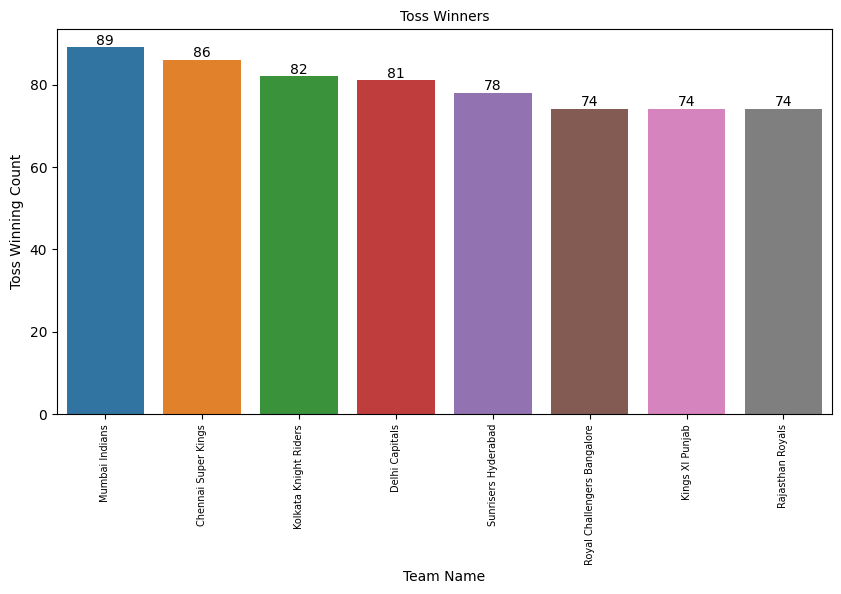

In [16]:
plt.figure(figsize=(10,5))

ax = sns.countplot('toss_winner', data=matches_lt,order=matches_lt['toss_winner'].value_counts().index)
ax.bar_label(ax.containers[0])

font = {"size":10}
plt.xticks(rotation='vertical',fontsize=7)
plt.title("Toss Winners",fontdict=font)
plt.xlabel("Team Name",fontdict=font)
plt.ylabel("Toss Winning Count",fontdict=font)
plt.show();

### 5) Team With Most Match Wins

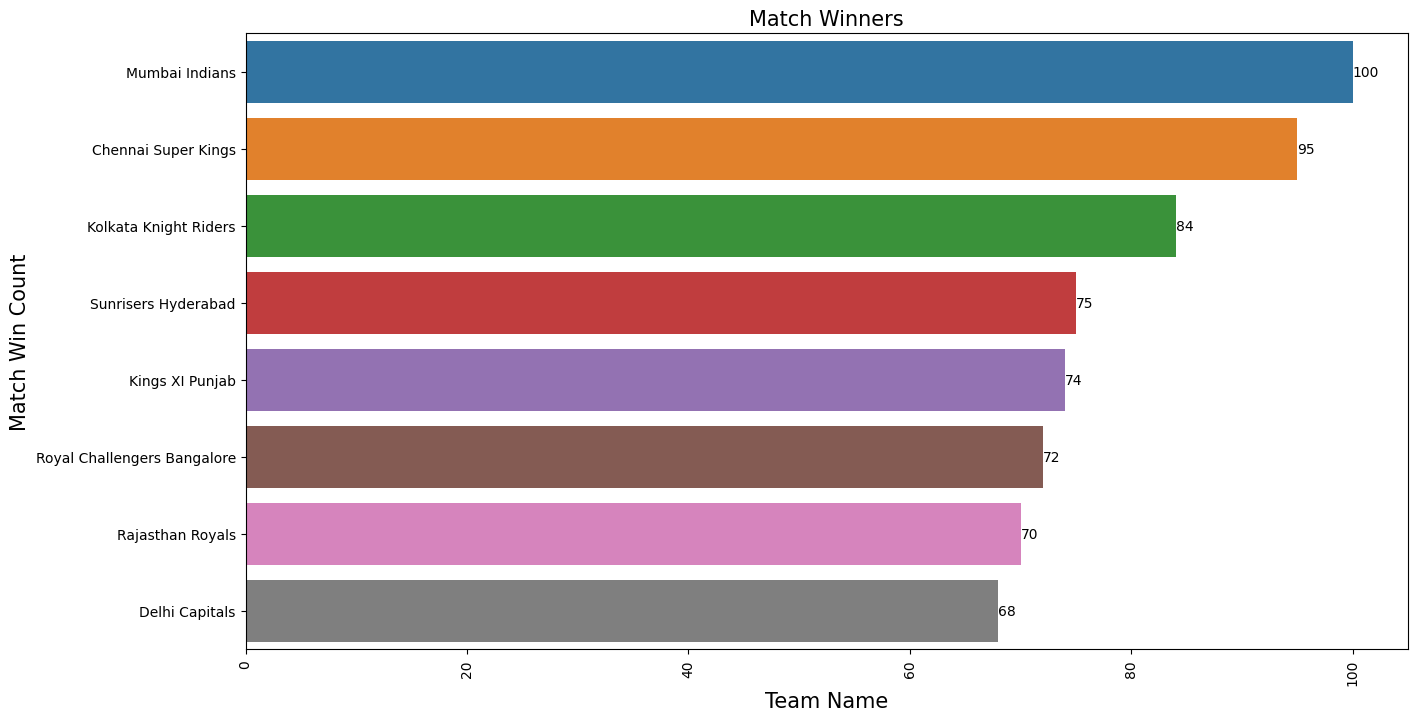

In [17]:
plt.figure(figsize=(15,8))

ax = sns.countplot(y='winner', data=matches_lt,order=matches_lt['winner'].value_counts().index)
ax.bar_label(ax.containers[0])

font = {"size":15}
plt.xticks(rotation='vertical',fontsize=10)
plt.title("Match Winners",fontdict=font)
plt.xlabel("Team Name",fontdict=font)
plt.ylabel("Match Win Count",fontdict=font)
plt.show();

### 6) Team Winning Toss & Matches Both

In [18]:
print('Teams With Their Percentage Chance of Winning if They Win Toss')
round((matches_lt[matches_lt['toss_winner']==matches_lt['winner']]['winner'].value_counts()/matches_lt['toss_winner'].value_counts())*100).sort_values(ascending=False)

Teams With Their Percentage Chance of Winning if They Win Toss


Chennai Super Kings            64.0
Mumbai Indians                 57.0
Kolkata Knight Riders          56.0
Rajasthan Royals               53.0
Royal Challengers Bangalore    51.0
Delhi Capitals                 44.0
Kings XI Punjab                42.0
Sunrisers Hyderabad            42.0
dtype: float64

<AxesSubplot:ylabel='None'>

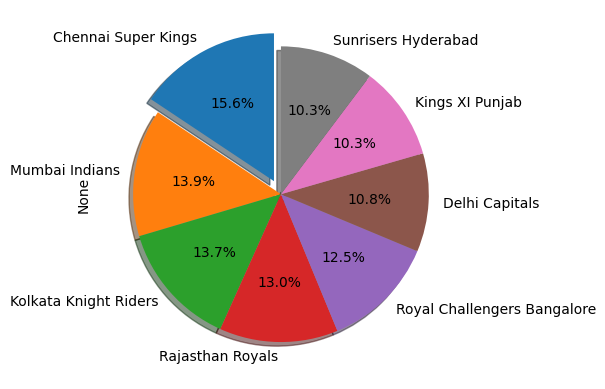

In [19]:
db = round((matches_lt[matches_lt['toss_winner']==matches_lt['winner']]['winner'].value_counts()/matches_lt['toss_winner'].value_counts())*100).sort_values(ascending=False)
explode = (0.1,0,0,0,0,0,0,0)
db.plot(kind='pie',autopct='%1.1f%%',explode=explode,shadow=True, startangle=90)

Chennai Super Kings            55
Mumbai Indians                 51
Kolkata Knight Riders          46
Rajasthan Royals               39
Royal Challengers Bangalore    38
Delhi Capitals                 36
Sunrisers Hyderabad            33
Kings XI Punjab                31
Name: winner, dtype: int64

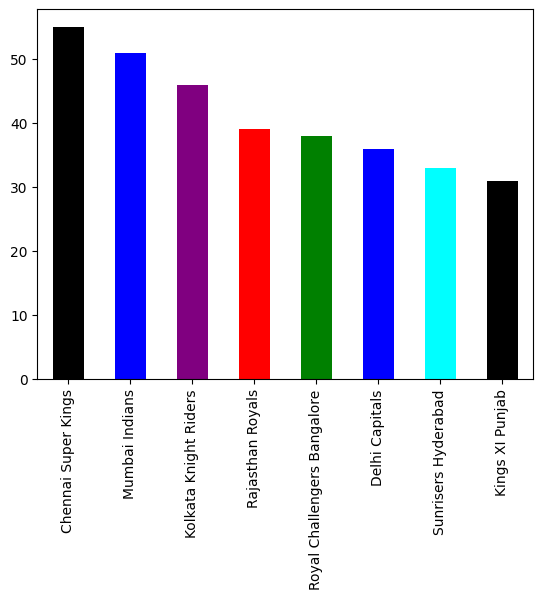

In [20]:
color=['black','blue','purple', 'red', 'green', 'blue', 'cyan']
winners = matches_lt[matches_lt['toss_winner']==matches_lt['winner']]['winner'].value_counts()
winners.plot(kind='bar',color=color);
winners

### 7) Player With Most Runs

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
AM Rahane         3850
KD Karthik        3688
SR Watson         3614
AT Rayudu         3326
YK Pathan         3241
BB McCullum       2893
PA Patel          2874
MK Pandey         2872
KA Pollard        2784
Yuvraj Singh      2765
Name: batsman_runs, dtype: int64


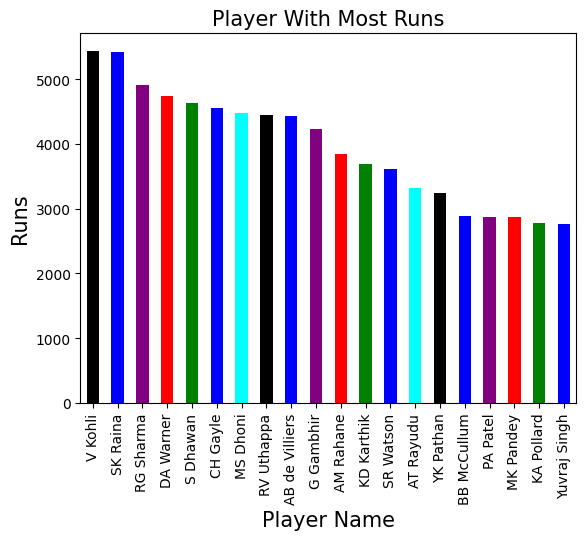

In [21]:
top_20_run_scorer = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[:20]
print(top_20_run_scorer)
top_20_run_scorer.plot(kind='bar',color=color)
plt.title("Player With Most Runs",fontdict=font)
plt.xlabel("Player Name",fontdict=font)
plt.ylabel("Runs",fontdict=font)
plt.show();


<BarContainer object of 20 artists>

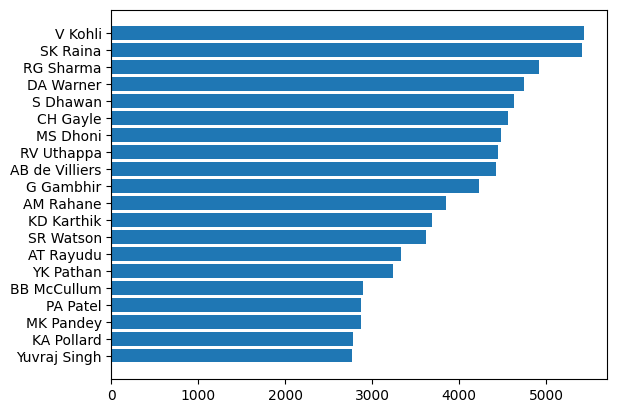

In [22]:
plt.barh(top_20_run_scorer.index[::-1],top_20_run_scorer.values[::-1])

### 8) Most Expensive Bowlers

In [23]:
### Overall
temp1 = deliveries.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values('total_runs', ascending=False).head(10)
temp1

,bowler,total_runs
264,PP Chawla,4153
126,Harbhajan Singh,4050
7,A Mishra,3850
93,DJ Bravo,3733
381,UT Yadav,3640
340,SL Malinga,3511
269,R Ashwin,3391
251,P Kumar,3342
53,B Kumar,3264
282,RA Jadeja,3221


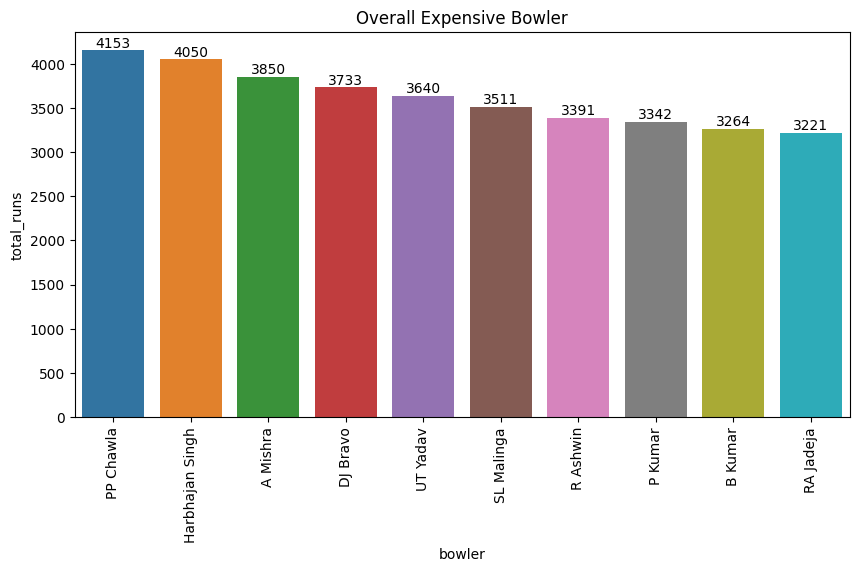

In [24]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='bowler',y='total_runs',data=temp1)
plt.xticks(rotation='vertical',fontsize=10)
ax.bar_label(ax.containers[0])
plt.title('Overall Expensive Bowler')
plt.show()

In [25]:
#### Expensive Bowler In 20th Over
twenty_over = deliveries[deliveries['over']==20]
temp2 = twenty_over.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values('total_runs', ascending=False).head(10)
temp2

,bowler,total_runs
51,DJ Bravo,531
153,R Vinay Kumar,389
197,UT Yadav,341
28,B Kumar,325
11,AB Dinda,276
159,RP Singh,268
104,L Balaji,264
72,IK Pathan,264
179,SL Malinga,262
184,SR Watson,250


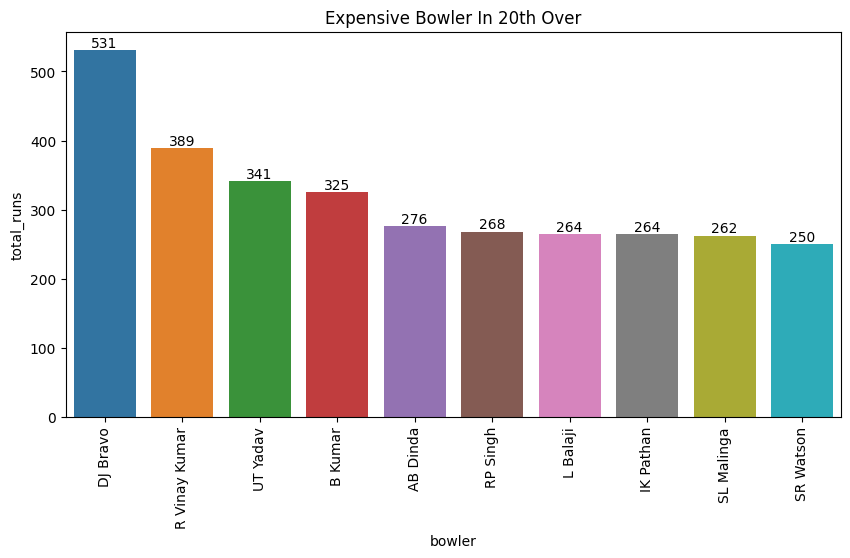

In [26]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='bowler',y='total_runs',data=temp2)
plt.xticks(rotation='vertical',fontsize=10)
ax.bar_label(ax.containers[0])
plt.title('Expensive Bowler In 20th Over')
plt.show()

In [27]:
#### Expensive Bowler In 1 st Over
twenty_over = deliveries[deliveries['over']==1]
temp3 = twenty_over.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values('total_runs', ascending=False).head(10)
temp3

,bowler,total_runs
118,P Kumar,462
187,Z Khan,407
25,B Kumar,394
166,Sandeep Sharma,306
70,JA Morkel,261
64,IK Pathan,251
52,DW Steyn,241
46,DL Chahar,214
26,B Lee,208
173,TG Southee,189


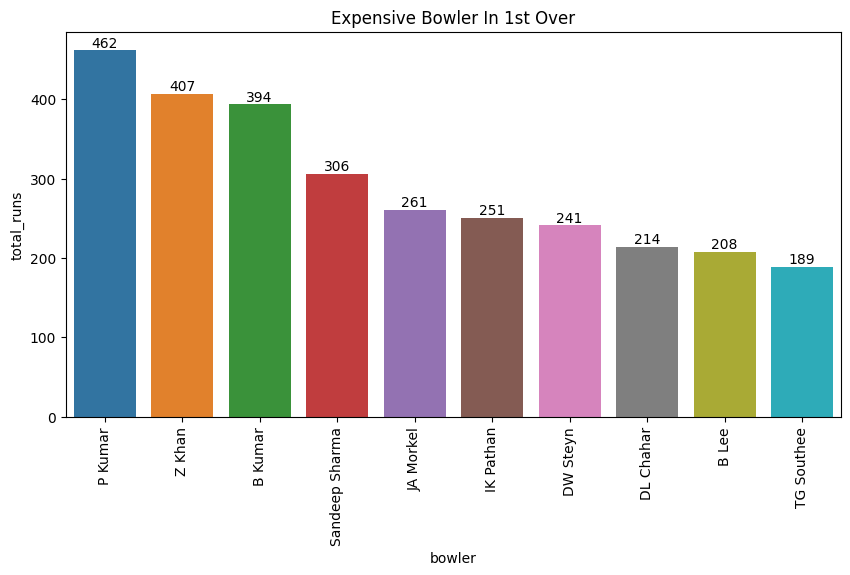

In [28]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='bowler',y='total_runs',data=temp3)
plt.xticks(rotation='vertical',fontsize=10)
ax.bar_label(ax.containers[0])
plt.title('Expensive Bowler In 1st Over')
plt.show()

### 9) Overwise Runs for Each Team

In [29]:
def latest_teams(df,cols):
    temp = df.copy()
    teams = [
        'Sunrisers Hyderabad',
        'Mumbai Indians',
        'Royal Challengers Bangalore',
        'Kolkata Knight Riders',
        'Kings XI Punjab',
        'Chennai Super Kings',
        'Rajasthan Royals',
        'Delhi Capitals'
    ]
    
    for col in cols:
        temp[col] = temp[col].str.replace('Deccan Chargers','Sunrisers Hyderabad')
        temp[col] = temp[col].str.replace('Delhi Daredevils','Delhi Capitals')

    for col in cols:
        temp = temp[(temp[col].isin(teams))]
    
    return temp

In [30]:
deliveries_latest = deliveries.copy()
deliveries_latest = latest_teams(deliveries_latest,['batting_team','bowling_team'])

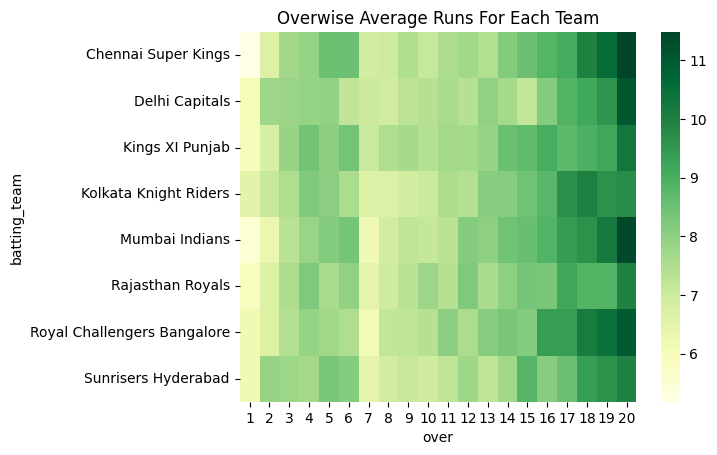

In [31]:
x = deliveries_latest.pivot_table(values='total_runs',index='batting_team',columns='over')*6
sns.heatmap(x, cmap='YlGn')
plt.title('Overwise Average Runs For Each Team');

### 10) Toss Winner Choice Based On Venue

In [32]:
top_venues = matches['venue'].value_counts()[:15].index.to_list()
top_20_venues_matches = matches[matches['venue'].isin(top_venues)]
top_20_venues_matches['venue'] = top_20_venues_matches['venue']+", "+top_20_venues_matches['city']
top_20 = top_20_venues_matches.groupby(['venue','toss_decision']).count()['toss_winner'].reset_index().sort_values('venue',ascending=False)
top_20

,venue,toss_decision,toss_winner
32,"Wankhede Stadium, Mumbai",field,51
31,"Wankhede Stadium, Mumbai",bat,22
30,"SuperSport Park, Centurion",field,6
29,"SuperSport Park, Centurion",bat,6
28,"Subrata Roy Sahara Stadium, Pune",field,2
27,"Subrata Roy Sahara Stadium, Pune",bat,15
26,"Sawai Mansingh Stadium, Jaipur",field,28
25,"Sawai Mansingh Stadium, Jaipur",bat,19
24,"Sardar Patel Stadium, Motera, Ahmedabad",field,6
23,"Sardar Patel Stadium, Motera, Ahmedabad",bat,6


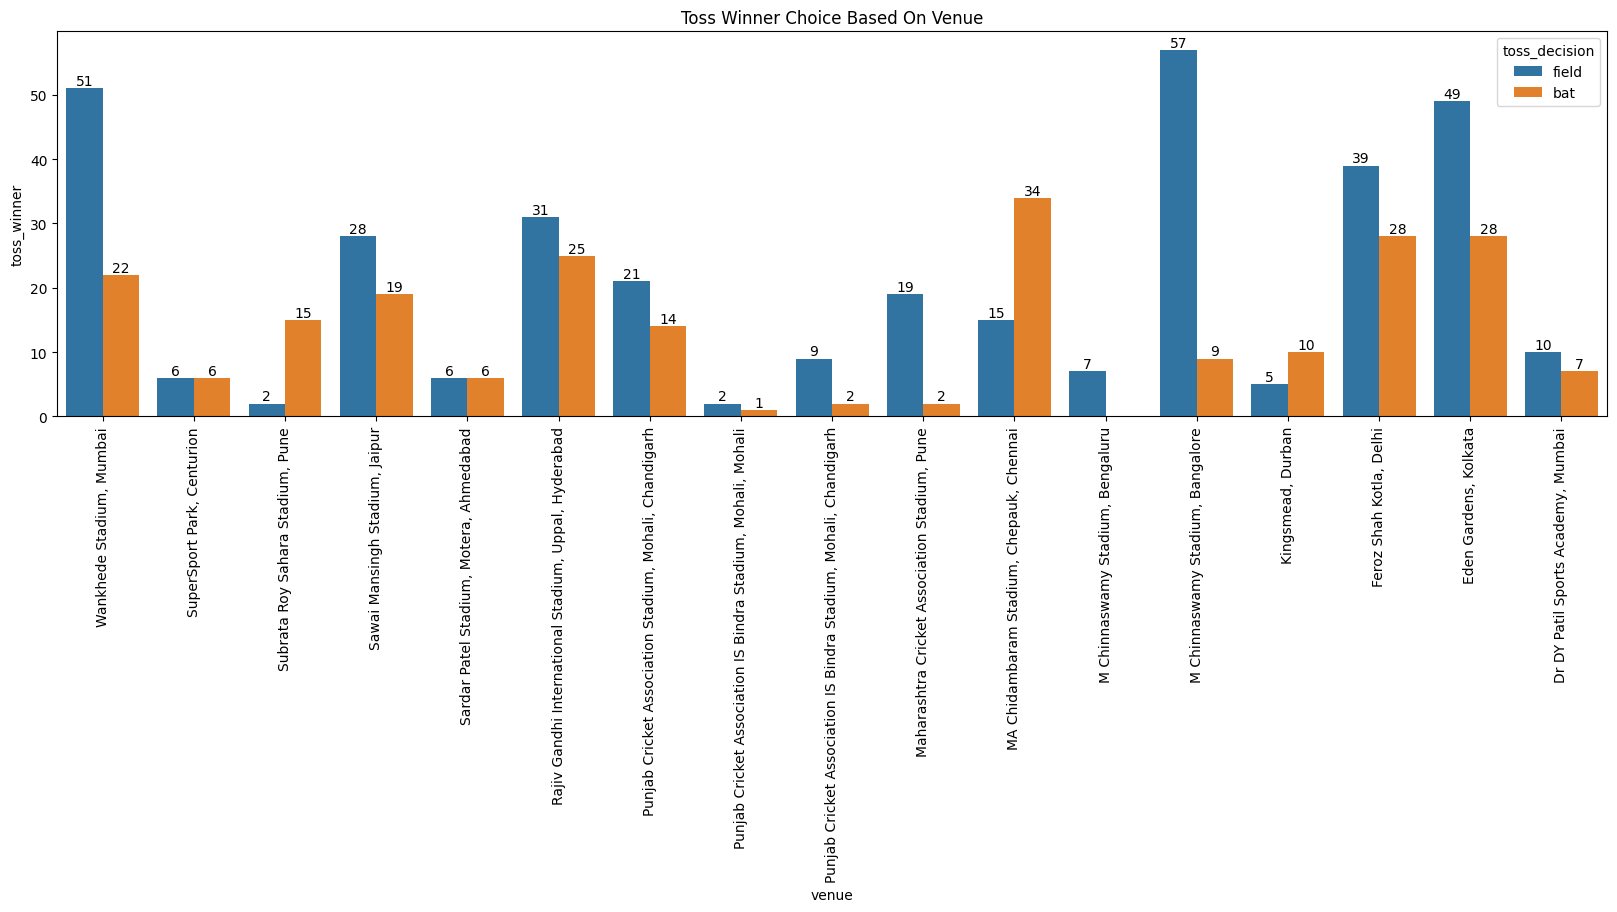

In [33]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='venue',y='toss_winner',hue='toss_decision',data=top_20)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation='vertical',fontsize=10)
plt.title('Toss Winner Choice Based On Venue')
plt.show();

### 11) Average Runs By Different Teams In Last Over

batting_team
Chennai Super Kings            11.0
Delhi Capitals                 11.0
Mumbai Indians                 11.0
Royal Challengers Bangalore    11.0
Kings XI Punjab                10.0
Kolkata Knight Riders          10.0
Rajasthan Royals               10.0
Sunrisers Hyderabad            10.0
Name: total_runs, dtype: float64

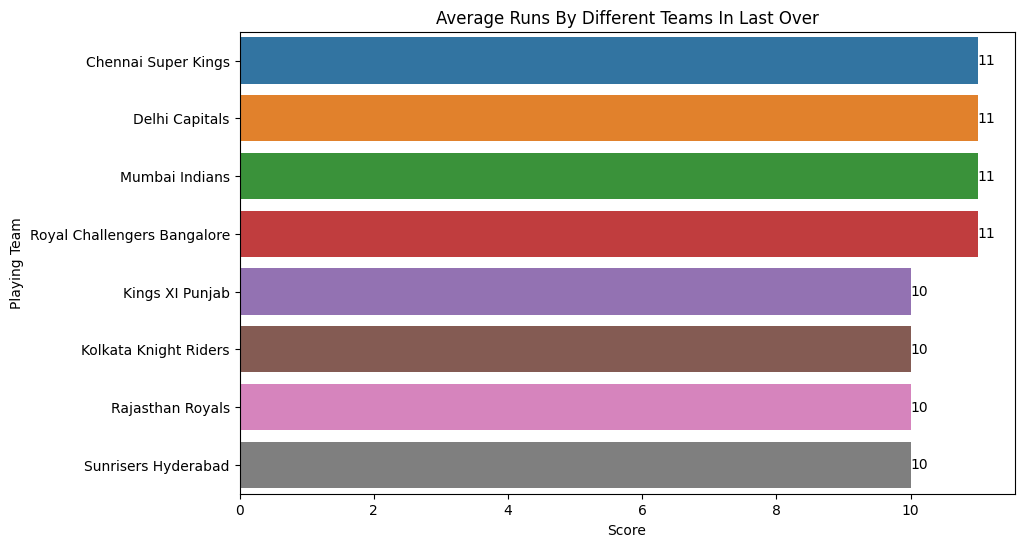

In [34]:
fig = plt.figure(figsize=(10,6))
twenty = deliveries_latest[deliveries_latest['over']==20]
twenty_over_scores = round(twenty.groupby('batting_team')['total_runs'].mean()*6).round(2).sort_values(ascending=False)
ax = sns.barplot(twenty_over_scores.values,twenty_over_scores.index)
ax.bar_label(ax.containers[0])
plt.title('Average Runs By Different Teams In Last Over')
plt.xlabel('Score')
plt.ylabel('Playing Team')
twenty_over_scores

### 12) Total Runs By Different Teams In Last Over Till Start

batting_team
Mumbai Indians                 1540
Chennai Super Kings            1441
Sunrisers Hyderabad            1358
Kings XI Punjab                1289
Royal Challengers Bangalore    1278
Delhi Capitals                 1195
Kolkata Knight Riders          1057
Rajasthan Royals               1000
Name: total_runs, dtype: int64

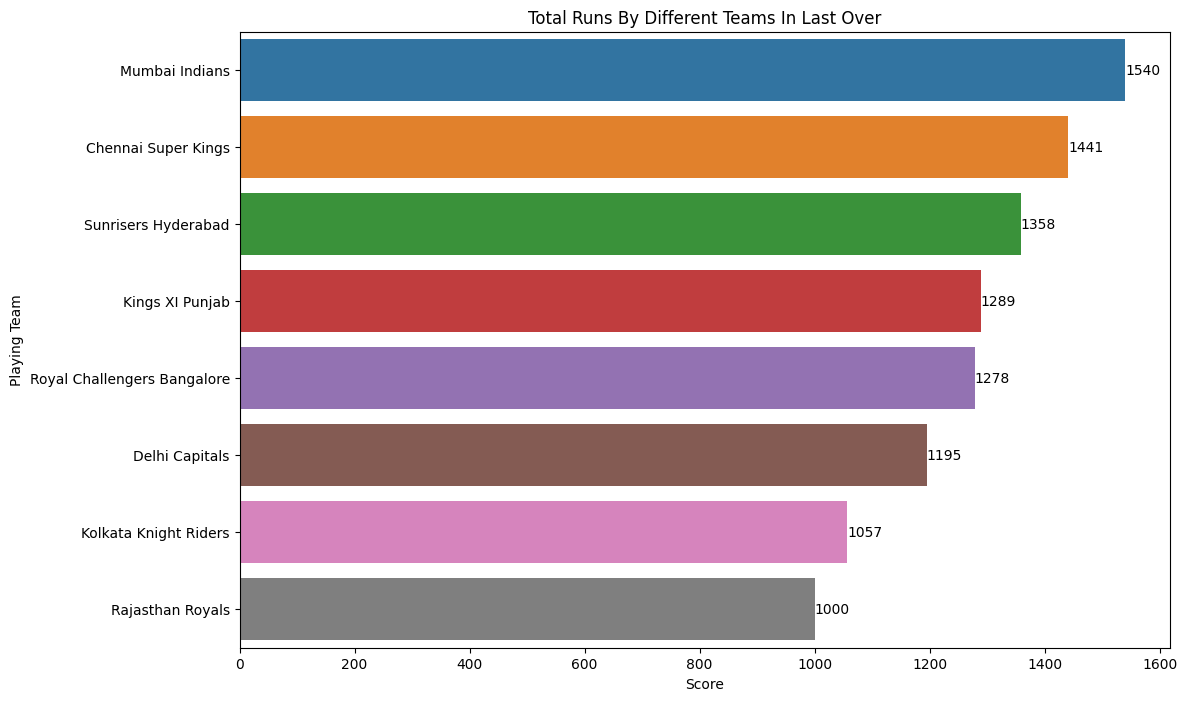

In [35]:
fig = plt.figure(figsize=(12,8))
twenty = deliveries_latest[deliveries_latest['over']==20]
twenty_over_scores = (twenty.groupby('batting_team')['total_runs'].sum()).sort_values(ascending=False)
#plt.barh(twenty_over_scores.index,twenty_over_scores.values);
ax = sns.barplot(twenty_over_scores.values,twenty_over_scores.index)
ax.bar_label(ax.containers[0])
plt.title('Total Runs By Different Teams In Last Over')
plt.xlabel('Score')
plt.ylabel('Playing Team')
twenty_over_scores

In [36]:
combine_df = matches_lt.merge(deliveries_latest,left_on = 'id',right_on = 'match_id',how = 'left')

In [37]:
combine_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

### 13) Total Runs By Different Teams In Last Over In Latest Edition (2019)

batting_team
Mumbai Indians                 187
Chennai Super Kings            173
Kings XI Punjab                150
Royal Challengers Bangalore    147
Sunrisers Hyderabad            138
Kolkata Knight Riders          135
Delhi Capitals                 131
Rajasthan Royals               128
Name: total_runs, dtype: int64

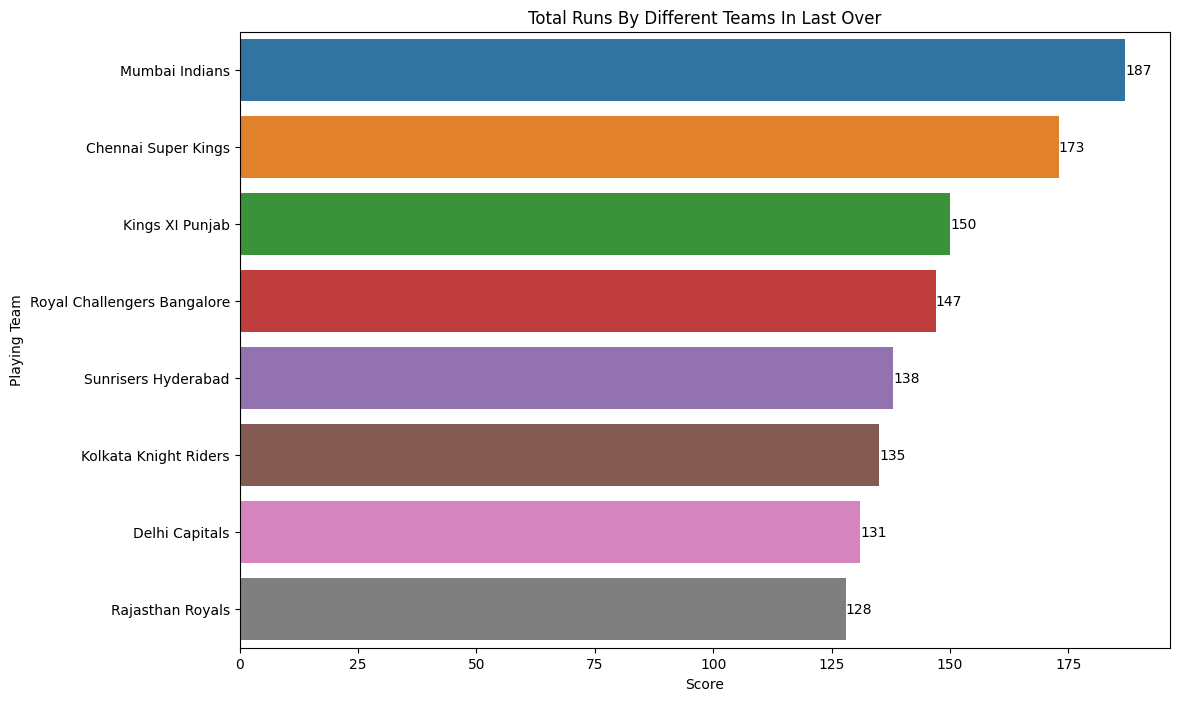

In [38]:
fig = plt.figure(figsize=(12,8))
twenty = combine_df[(combine_df['over']==20) & (combine_df['Season']=='IPL-2019')]
twenty_over_scores = (twenty.groupby('batting_team')['total_runs'].sum()).sort_values(ascending=False)
#plt.barh(twenty_over_scores.index,twenty_over_scores.values);
ax = sns.barplot(twenty_over_scores.values,twenty_over_scores.index)
ax.bar_label(ax.containers[0])
plt.title('Total Runs By Different Teams In Last Over')
plt.xlabel('Score')
plt.ylabel('Playing Team')
twenty_over_scores

### 14) Average Runs By Different Teams In Last Over In Latest Edition (2019)

batting_team
Sunrisers Hyderabad            13.80
Royal Challengers Bangalore    13.57
Mumbai Indians                 13.52
Chennai Super Kings            13.14
Kings XI Punjab                12.50
Delhi Capitals                 12.48
Rajasthan Royals               12.19
Kolkata Knight Riders          12.09
Name: total_runs, dtype: float64

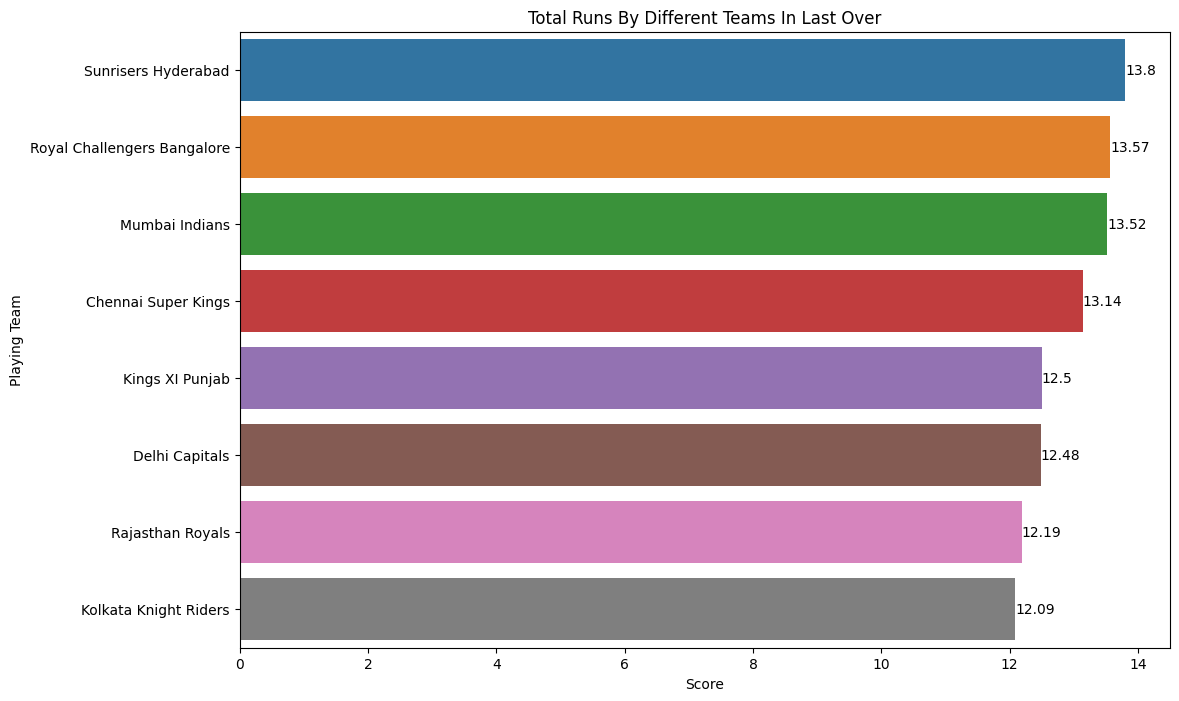

In [39]:
fig = plt.figure(figsize=(12,8))
twenty = combine_df[(combine_df['over']==20) & (combine_df['Season']=='IPL-2019')]
twenty_over_scores = (twenty.groupby('batting_team')['total_runs'].mean()*6).round(2).sort_values(ascending=False)
#plt.barh(twenty_over_scores.index,twenty_over_scores.values);
ax = sns.barplot(twenty_over_scores.values,twenty_over_scores.index)
ax.bar_label(ax.containers[0])
plt.title('Total Runs By Different Teams In Last Over')
plt.xlabel('Score')
plt.ylabel('Playing Team')
twenty_over_scores

### 15) Total Runs Scored in Each Season

In [40]:
combine_df['Season'] = combine_df['Season'].apply(lambda x:x.split('-')[-1])

,total_runs
Season,
2008,17937
2009,16353
2010,18883
2011,13877
2012,17708
2013,17821
2014,18931
2015,17964
2016,10347


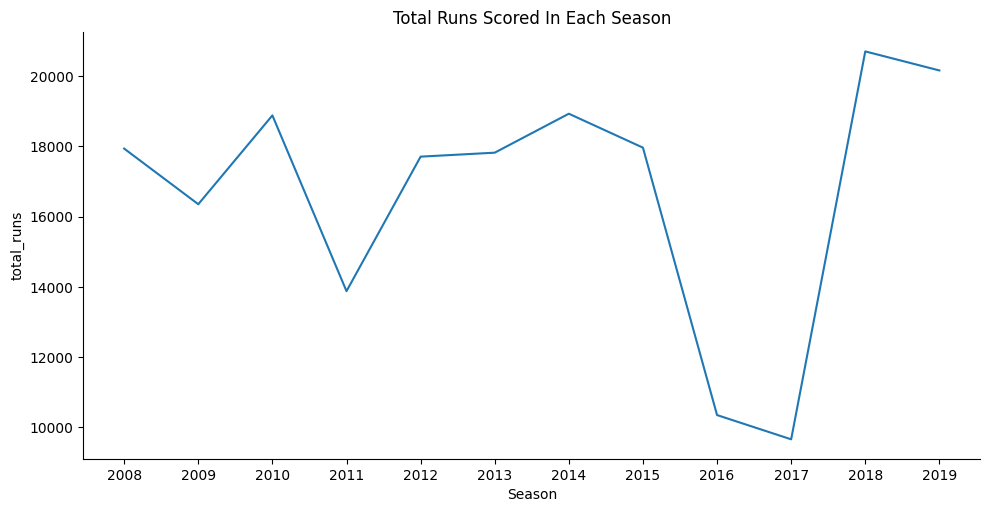

In [41]:
season = combine_df.groupby('Season')['total_runs'].sum().reset_index()
temp4=season.set_index('Season')
ax = sns.relplot(x=temp4.index,y=temp4['total_runs'],kind='line',height=5, aspect=2).set(title="Total Runs Scored In Each Season")
temp4

### 16) Count of Matches By Different Umpires

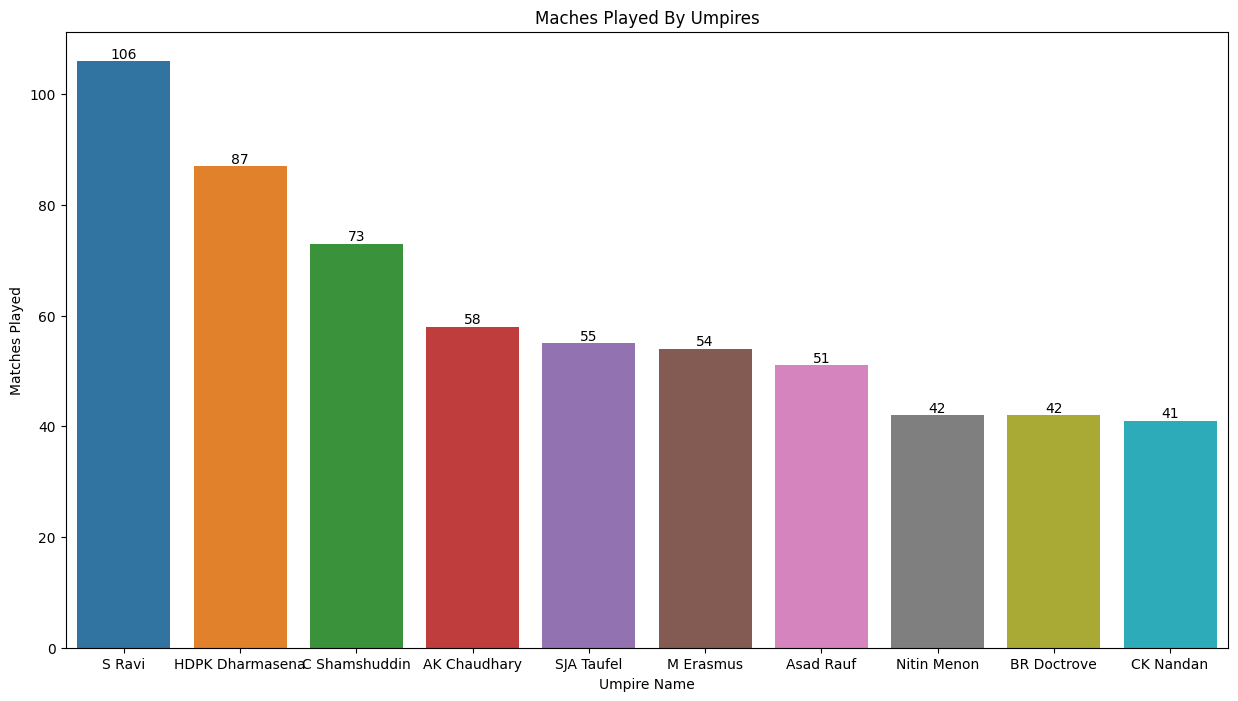

In [42]:
fig = plt.figure(figsize=(15,8))
umpires = pd.concat([matches['umpire1'],matches['umpire2']]).value_counts()
top_10_umpires = umpires.nlargest(10)
ax = sns.barplot(top_10_umpires.index,top_10_umpires.values)
ax.bar_label(ax.containers[0])
plt.title('Maches Played By Umpires')
plt.xlabel('Umpire Name')
plt.ylabel('Matches Played')
plt.show();

### 17) Lucky Venue For Teams

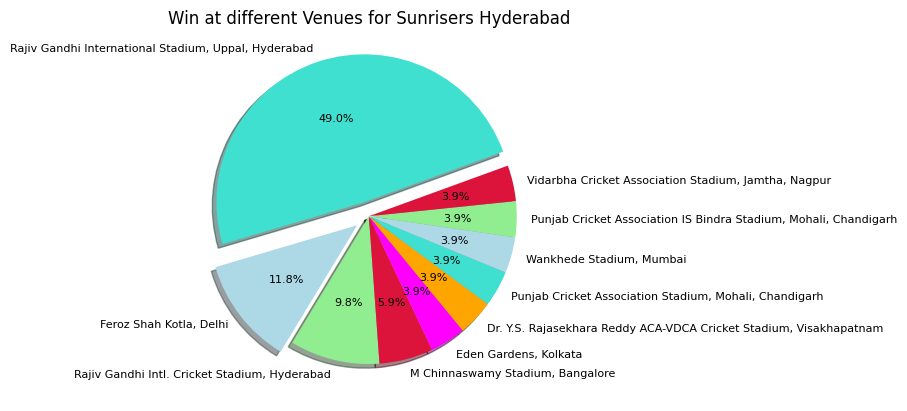

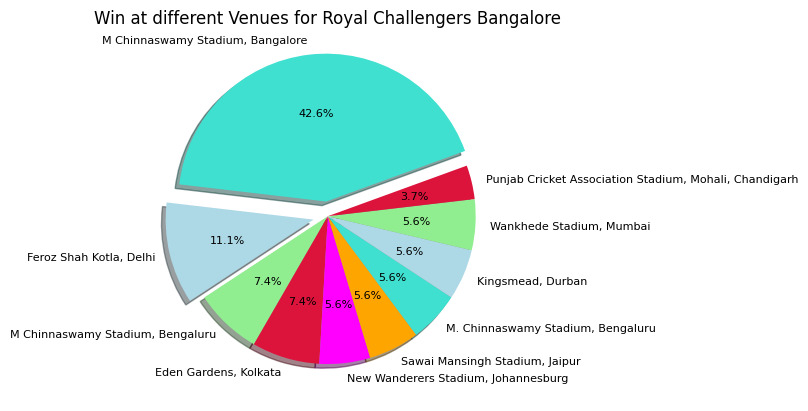

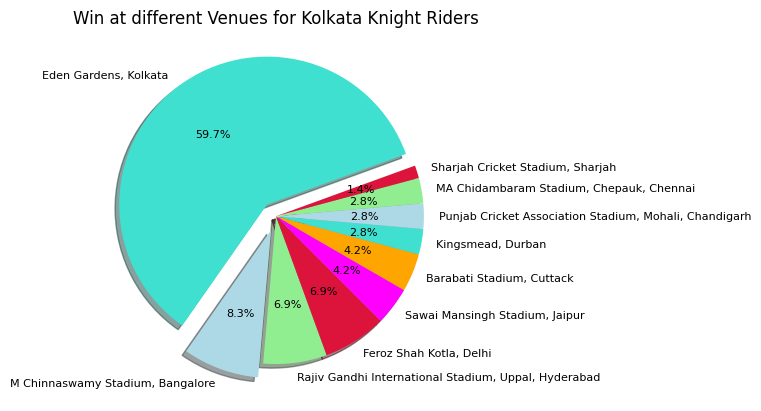

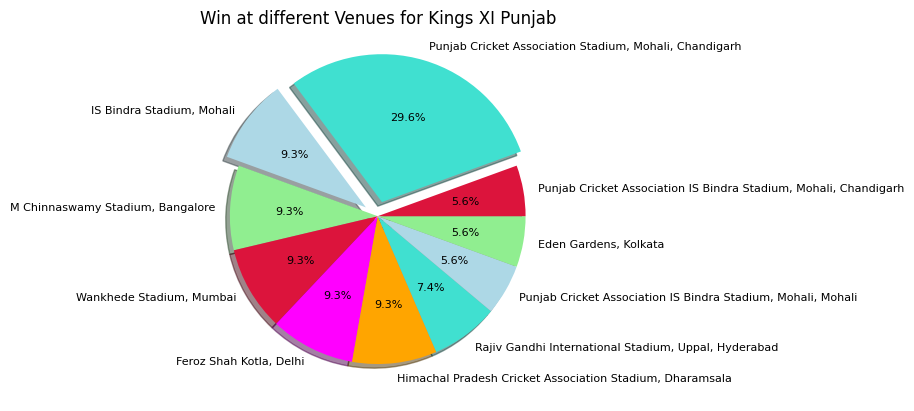

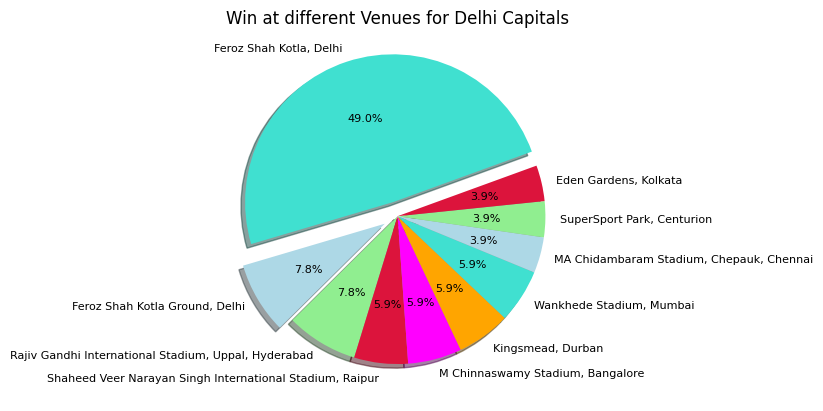

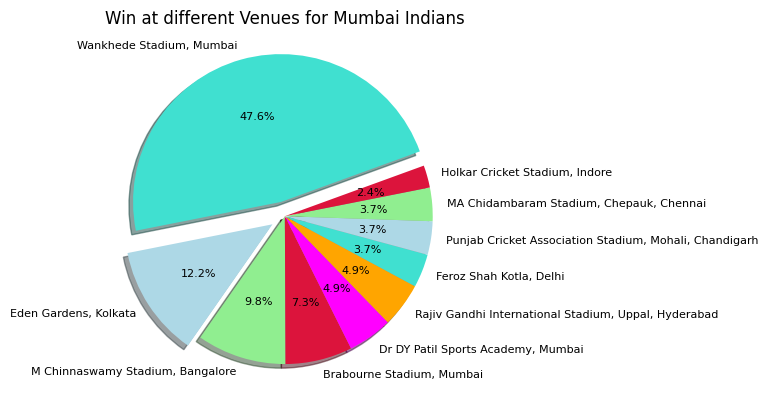

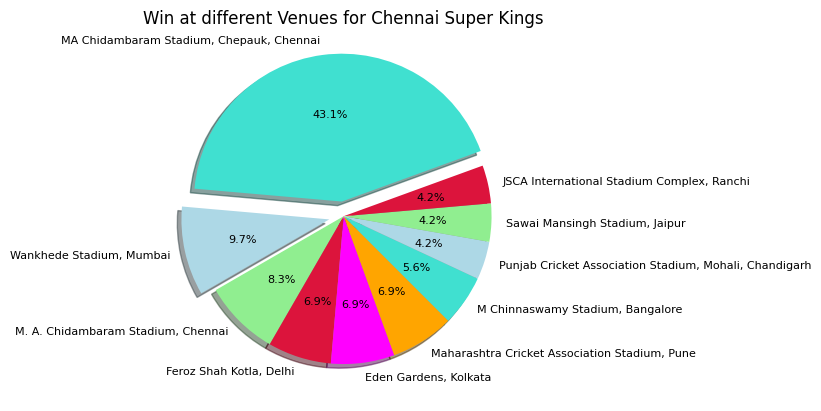

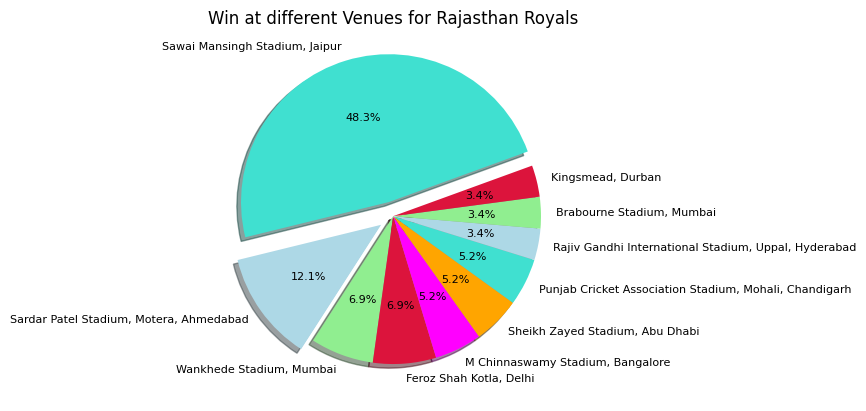

In [43]:
teams = matches_lt.team1.unique().tolist()
matches_lt['venue'] = matches_lt['venue']+", "+matches_lt['city']
for team in teams:
    team_name = team
    lucky_venues = matches_lt[matches_lt['winner']==team_name]['venue'].value_counts().nlargest(10)
    explode = (0.1,0.1,0,0,0,0,0,0,0,0)
    colors = ['turquoise', 'lightblue', 'lightgreen', 'crimson', 'magenta','orange']
    lucky_venues.plot(kind='pie',autopct='%1.1f%%',explode=explode,shadow=True, startangle=20,textprops={'fontsize': 8},colors=colors)
    plt.title(f'Win at different Venues for {team}')
    plt.ylabel('')
    plt.show()

### 18) Teams With More Than 200+ Scores

In [44]:
deliveries_latest.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


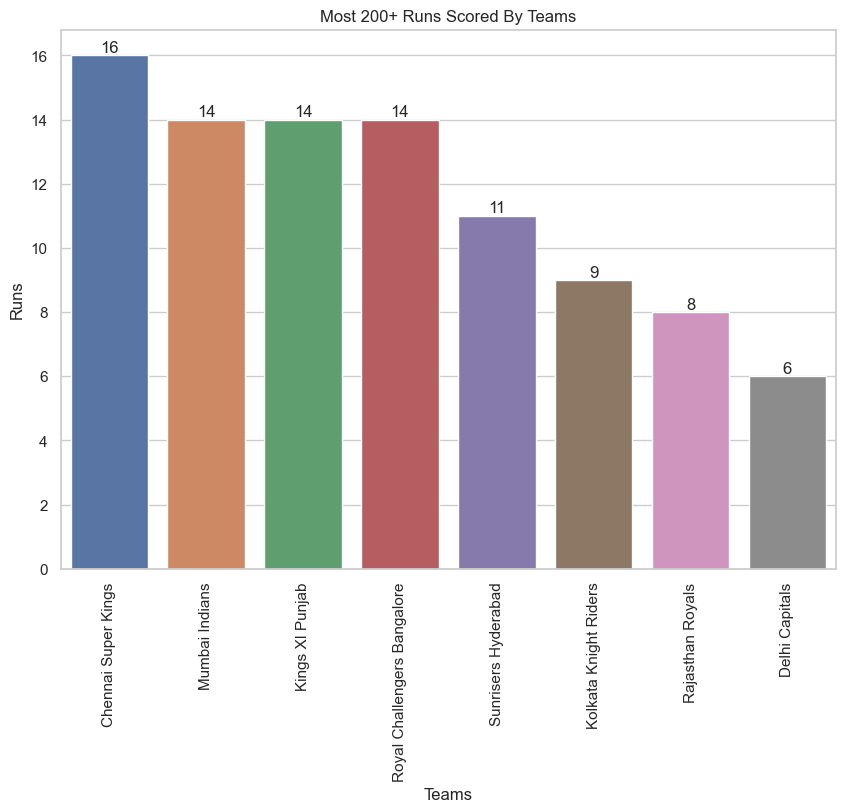

In [45]:
fig = plt.figure(figsize=(10,7))
runs = deliveries_latest.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
runs_over_200_df = runs[runs['total_runs']>200]
runs_over_200 = runs_over_200_df['batting_team'].value_counts()

sns.set_theme(style="whitegrid")
ax = sns.barplot(runs_over_200.index,runs_over_200.values)
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.title('Most 200+ Runs Scored By Teams')
plt.xlabel('Teams')
plt.ylabel('Runs')
plt.show();

#### SEE YOU LATER EDA 😀

## Dashboard Building

### TEAM vs TEAM

In [113]:
matches_lt['team1'].unique().tolist()

['Sunrisers Hyderabad',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Delhi Capitals',
 'Mumbai Indians',
 'Chennai Super Kings',
 'Rajasthan Royals']

In [47]:
t1 = 'Sunrisers Hyderabad'
t2 = 'Royal Challengers Bangalore'

In [48]:
### Accronym
orth = ['Sunrisers Hyderabad','Kings XI Punjab']
if t1 in orth:
    if t1==orth[0]:
        acr_t1='SRH'
    else:
        acr_t1 = 'KXIP'
else:
    acr_t1 = "".join([word[0] for word in t1.split()])
if t2 in orth:
    if t2==orth[0]:
        acr_t2='SRH'
    else:
        acr_t2 = 'KXIP'
else:
    acr_t2 = "".join([word[0] for word in t2.split()])

In [49]:
acr_t1,acr_t2

('SRH', 'RCB')

In [50]:
#### Number of Times Faced Each Other
t1_batting = matches_lt[((matches_lt['team1']==t1) & (matches_lt['team2']==t2))]
t2_batting = matches_lt[((matches_lt['team1']==t2) & (matches_lt['team2']==t1))]

In [51]:
total = t1_batting.append(t2_batting)

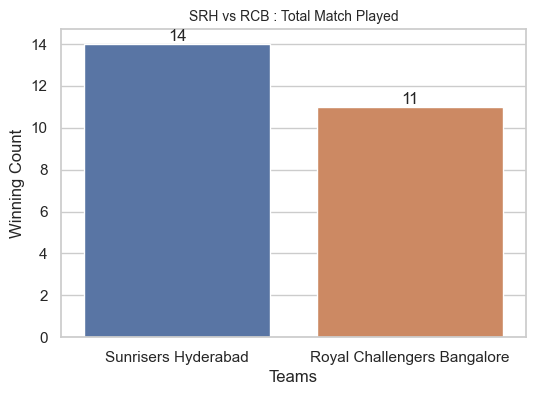

In [52]:
### Total Match Played
fig = plt.figure(figsize=(6,4))
sns.set_theme(style="whitegrid")
ax = sns.countplot(total['winner'])
ax.bar_label(ax.containers[0])
plt.title(f'{acr_t1} vs {acr_t2} : Total Match Played',fontsize=10)
plt.xlabel('Teams')
plt.ylabel('Winning Count')
plt.show()

Royal Challengers Bangalore    14
Sunrisers Hyderabad            11
Name: toss_winner, dtype: int64


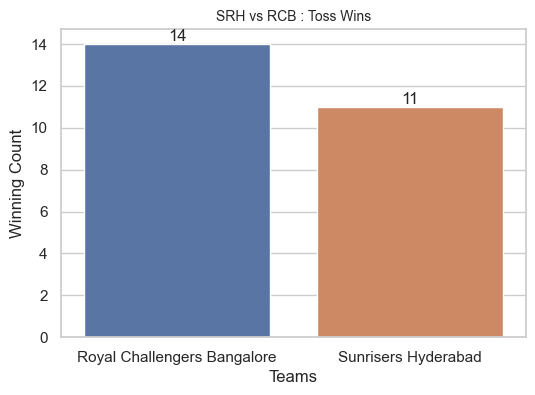

In [53]:
### Toss Wins
fig = plt.figure(figsize=(6,4))
print(total['toss_winner'].value_counts())
ax = sns.countplot(total['toss_winner'])
ax.bar_label(ax.containers[0])
plt.title(f'{acr_t1} vs {acr_t2} : Toss Wins',fontsize=10)
plt.xlabel('Teams')
plt.ylabel('Winning Count')
plt.show()

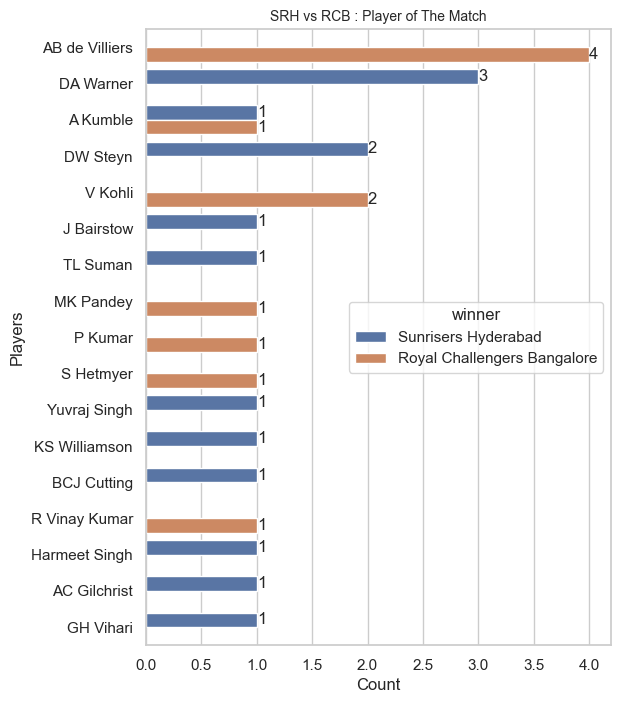

In [54]:
### Player of the Match
fig = plt.figure(figsize=(6,8))
ax = sns.countplot(y = total['player_of_match'],hue=total['winner'],order=total['player_of_match'].value_counts().index)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title(f'{acr_t1} vs {acr_t2} : Player of The Match',fontsize=10)
plt.xlabel('Count')
plt.ylabel('Players')
plt.show()

In [55]:
t1_batting = combine_df[((combine_df['batting_team']==t1) & (combine_df['bowling_team']==t2))]
t2_batting = combine_df[((combine_df['batting_team']==t2) & (combine_df['bowling_team']==t1))]
total_del = t1_batting.append(t2_batting)

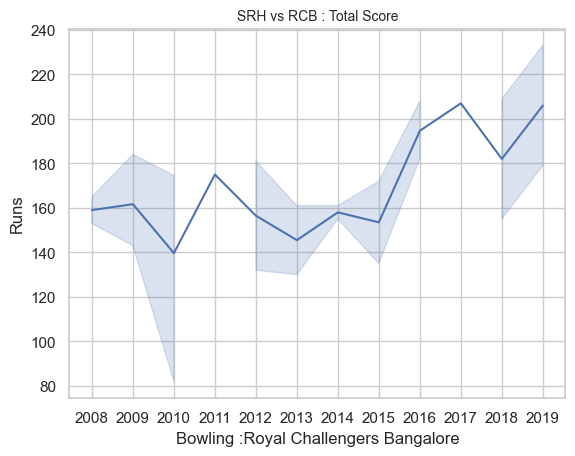

In [56]:
####### Batting t1
temp = total_del.groupby(['Season','match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
temp = temp[temp['inning']<3]

runs = temp[temp.batting_team==t1][['total_runs','Season','match_id','inning']]

sns.lineplot(data=runs,x='Season',y='total_runs')
plt.title(f'{acr_t1} vs {acr_t2} : Total Score',fontsize=10)
plt.xlabel(f'Bowling :{t2}')
plt.ylabel(f'Runs')
plt.show();

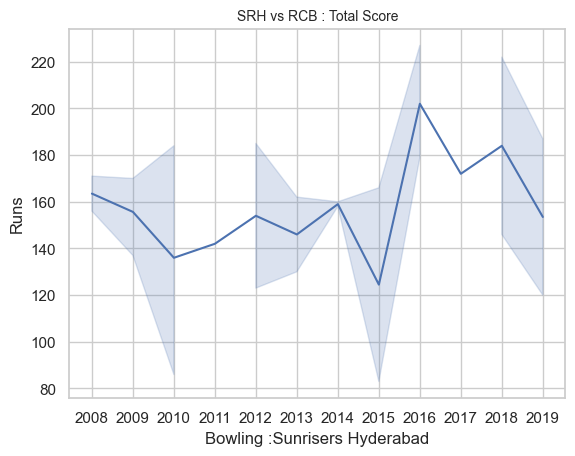

In [57]:
####### Batting t2
temp = total_del.groupby(['Season','match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
temp = temp[temp['inning']<3]

runs = temp[temp.batting_team==t2][['total_runs','Season','match_id','inning']]

sns.lineplot(data=runs,x='Season',y='total_runs')
plt.title(f'{acr_t1} vs {acr_t2} : Total Score',fontsize=10)
plt.xlabel(f'Bowling :{t1}')
plt.ylabel(f'Runs')
plt.show();

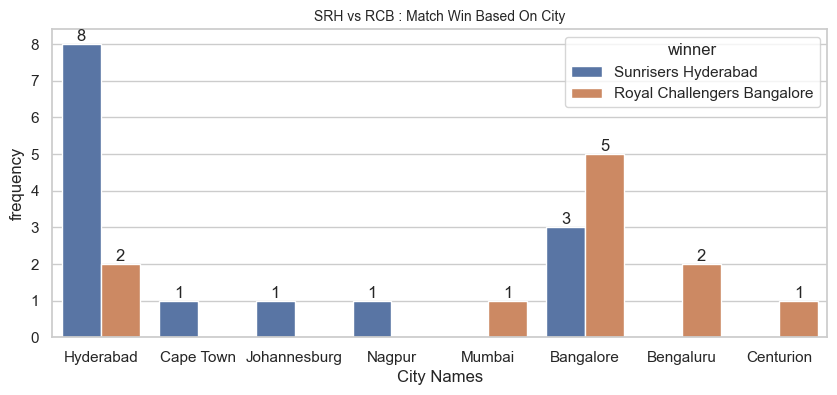

In [58]:
#### Match Win Based On City
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x = total['city'],hue=total['winner'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title(f'{acr_t1} vs {acr_t2} : Match Win Based On City',fontsize=10)
plt.xlabel('City Names')
plt.ylabel('frequency')
plt.show();

In [59]:
print(f'Team: {t1} -vs- {t2}')
print(f"Extra Runs : {total_del[total_del.bowling_team==t1]['extra_runs'].sum()}")
print(f"Sixes:{total_del[(total_del['batting_team']==t1) & (total_del['total_runs']==6)].count()[0]}")
print(f"Fours:{total_del[(total_del['batting_team']==t1) & (total_del['total_runs']==4)].count()[0]}")
print(f"Doubles:{total_del[(total_del['batting_team']==t1) & (total_del['total_runs']==2)].count()[0]}")
print(f"Singles:{total_del[(total_del['batting_team']==t1) & (total_del['total_runs']==1)].count()[0]}")
print(f"Total Runs :{total_del[total_del['batting_team']==t1]['total_runs'].sum()}")

Team: Sunrisers Hyderabad -vs- Royal Challengers Bangalore
Extra Runs : 167
Sixes:177
Fours:333
Doubles:226
Singles:1297
Total Runs :4211


In [60]:
print(f'Team: {t2} -vs- {t1}')
print(f"Extra Runs : {total_del[total_del.bowling_team==t2]['extra_runs'].sum()}")
print(f"Sixes:{total_del[(total_del['batting_team']==t2) & (total_del['total_runs']==6)].count()[0]}")
print(f"Fours:{total_del[(total_del['batting_team']==t2) & (total_del['total_runs']==4)].count()[0]}")
print(f"Doubles:{total_del[(total_del['batting_team']==t2) & (total_del['total_runs']==2)].count()[0]}")
print(f"Singles:{total_del[(total_del['batting_team']==t2) & (total_del['total_runs']==1)].count()[0]}")
print(f"Total Runs :{total_del[total_del['batting_team']==t2]['total_runs'].sum()}")

Team: Royal Challengers Bangalore -vs- Sunrisers Hyderabad
Extra Runs : 212
Sixes:165
Fours:337
Doubles:217
Singles:1148
Total Runs :3979


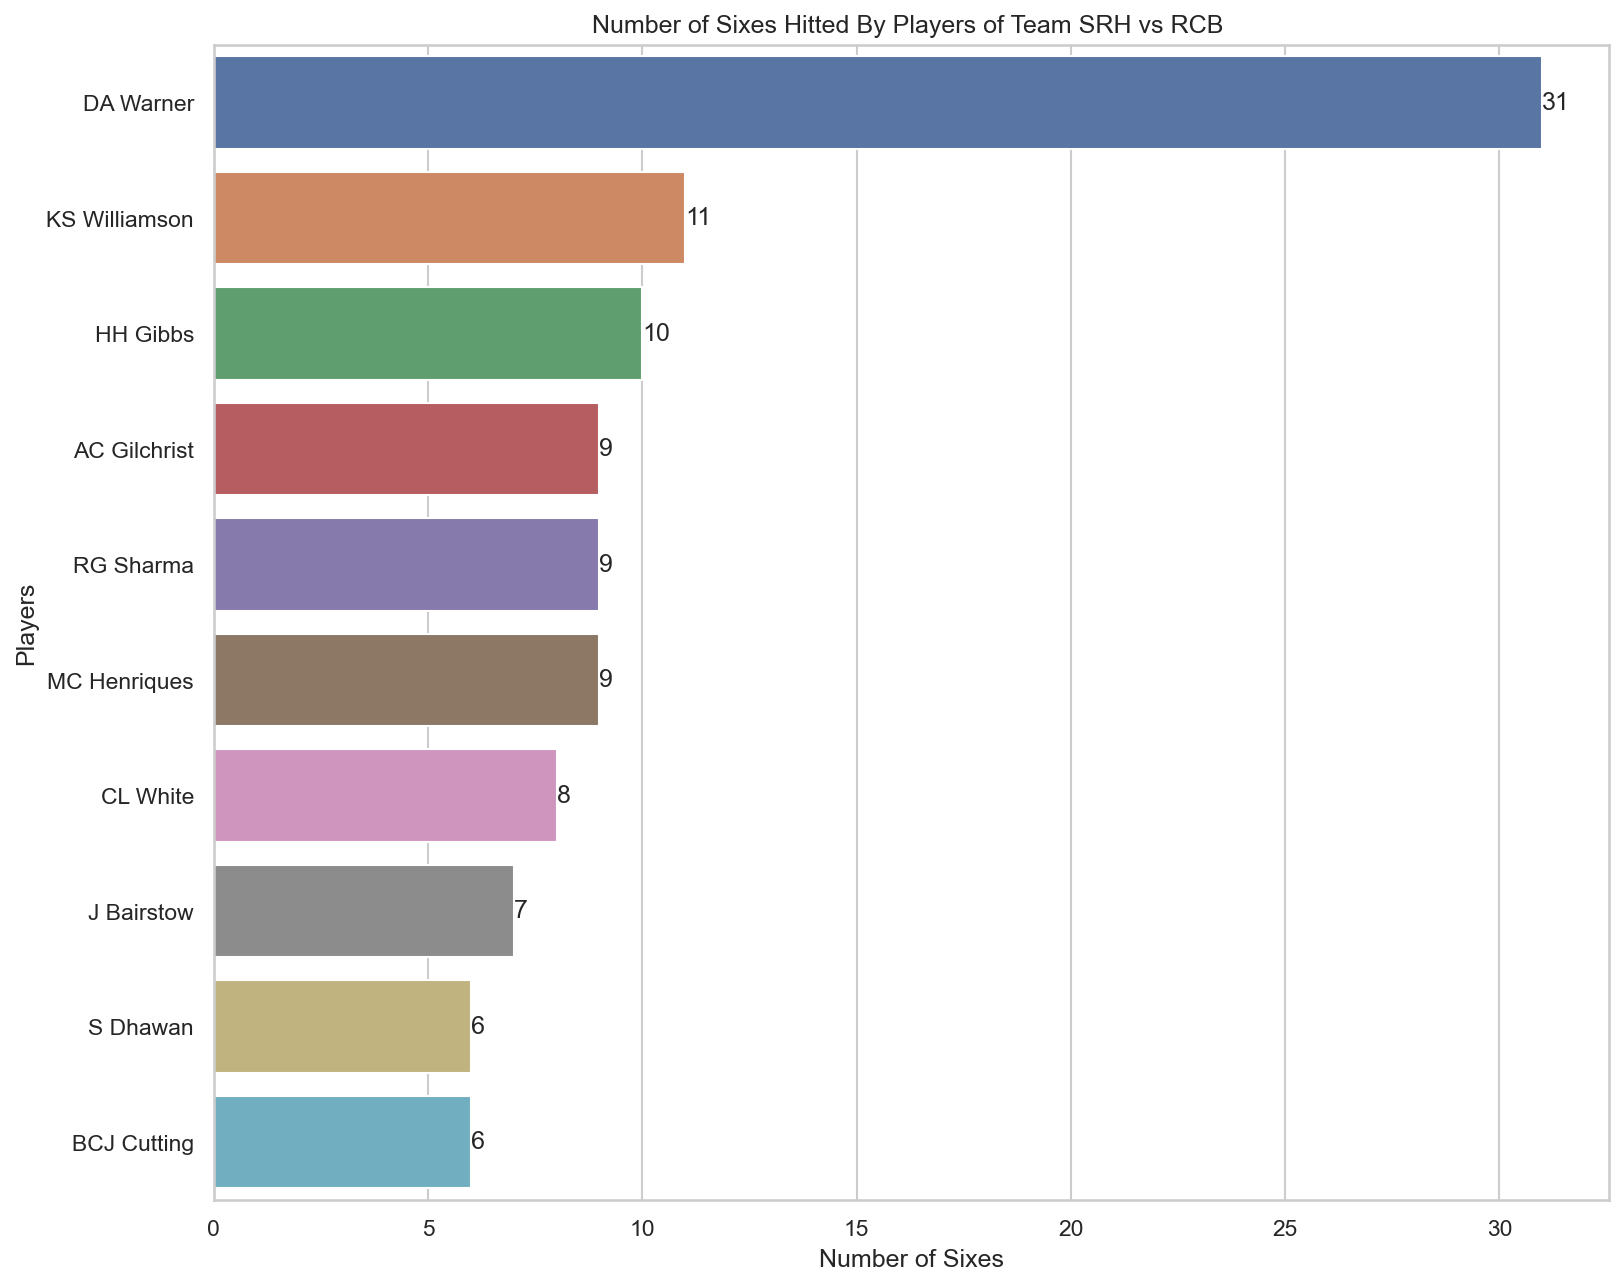

In [61]:
############# Team t1 (sixes)
fig = plt.figure(figsize=(12,10),dpi=150)
t1_player_six = total_del[(total_del['batting_team']==t1) & (total_del['total_runs']==6)]['batsman']
ax = sns.countplot(y=t1_player_six,order=t1_player_six.value_counts().iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.title(f"Number of Sixes Hitted By Players of Team {acr_t1} vs {acr_t2} ")
plt.ylabel('Players')
plt.xlabel('Number of Sixes')
plt.show();

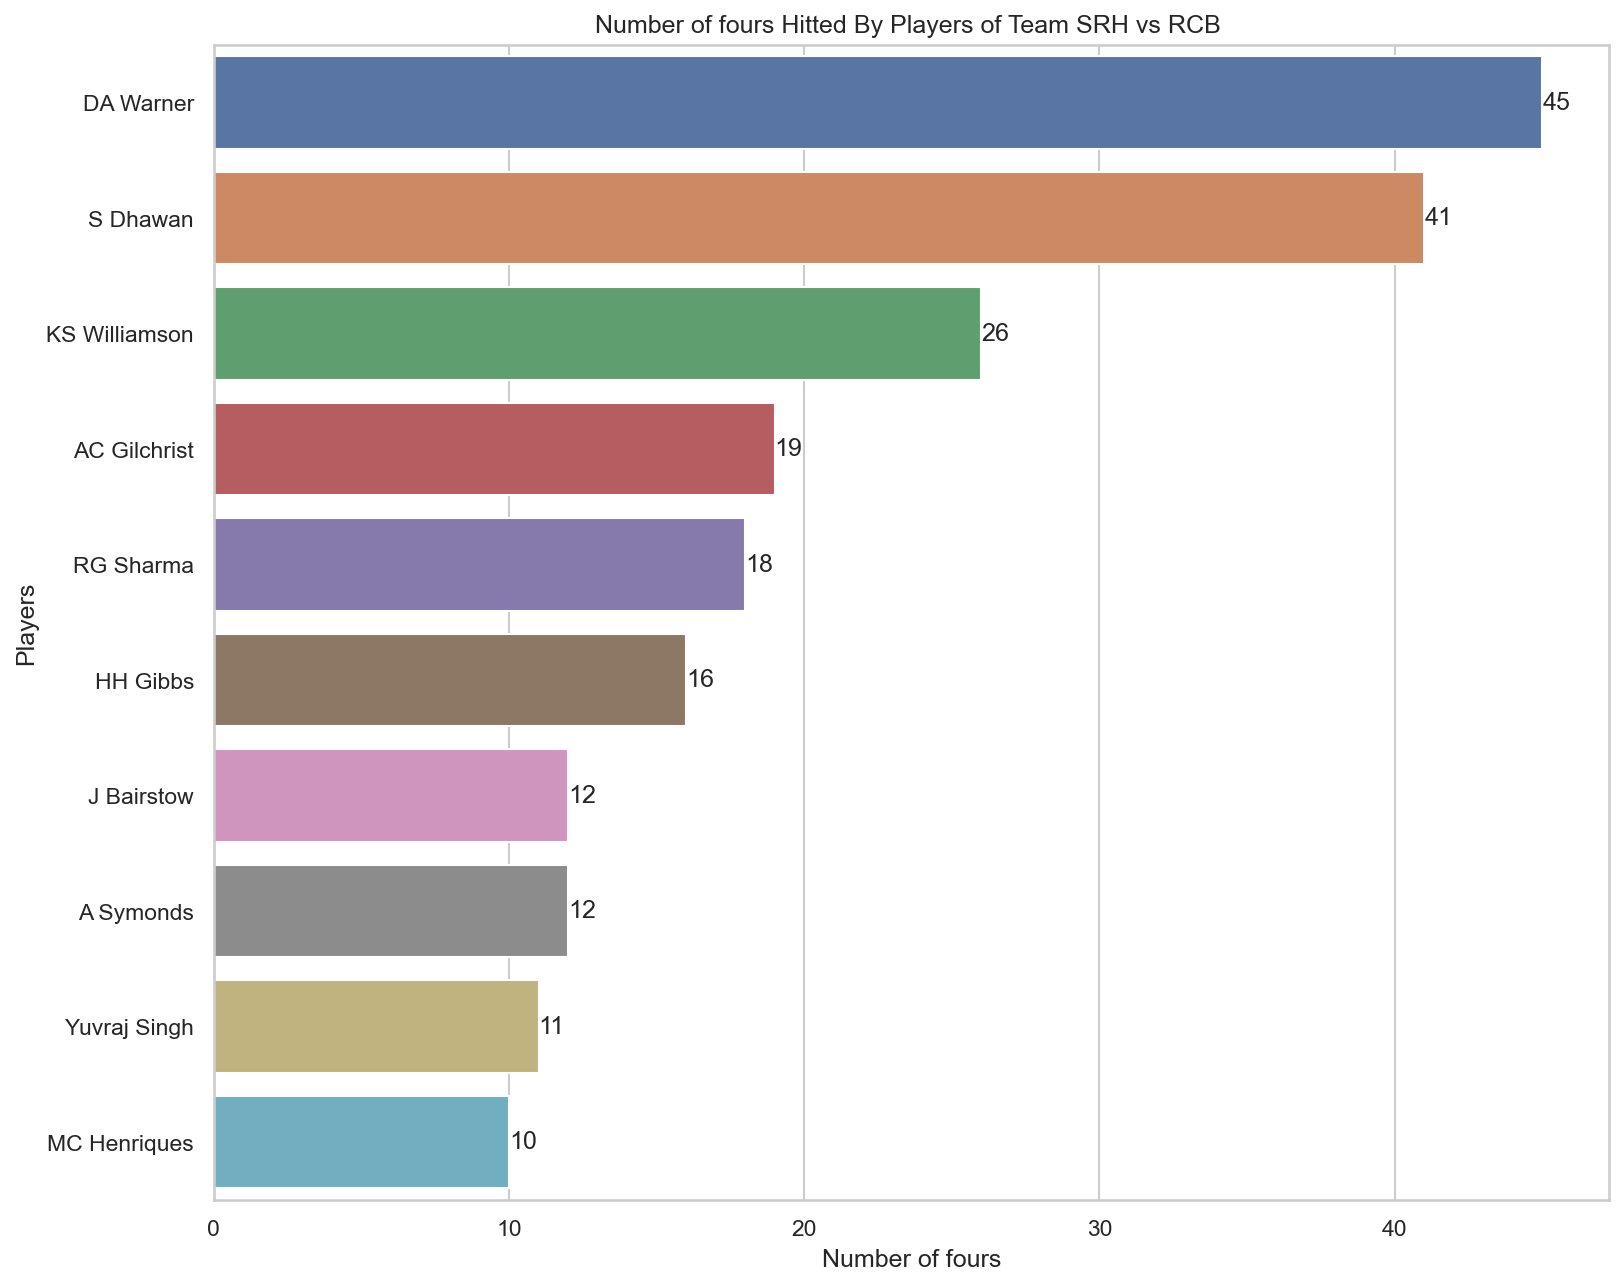

In [62]:
############# Team t1 (fours)
fig = plt.figure(figsize=(12,10),dpi=150)
t1_player_six = total_del[(total_del['batting_team']==t1) & (total_del['total_runs']==4)]['batsman']
ax = sns.countplot(y=t1_player_six,order=t1_player_six.value_counts().iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.title(f"Number of fours Hitted By Players of Team {acr_t1} vs {acr_t2} ")
plt.ylabel('Players')
plt.xlabel('Number of fours')
plt.show();

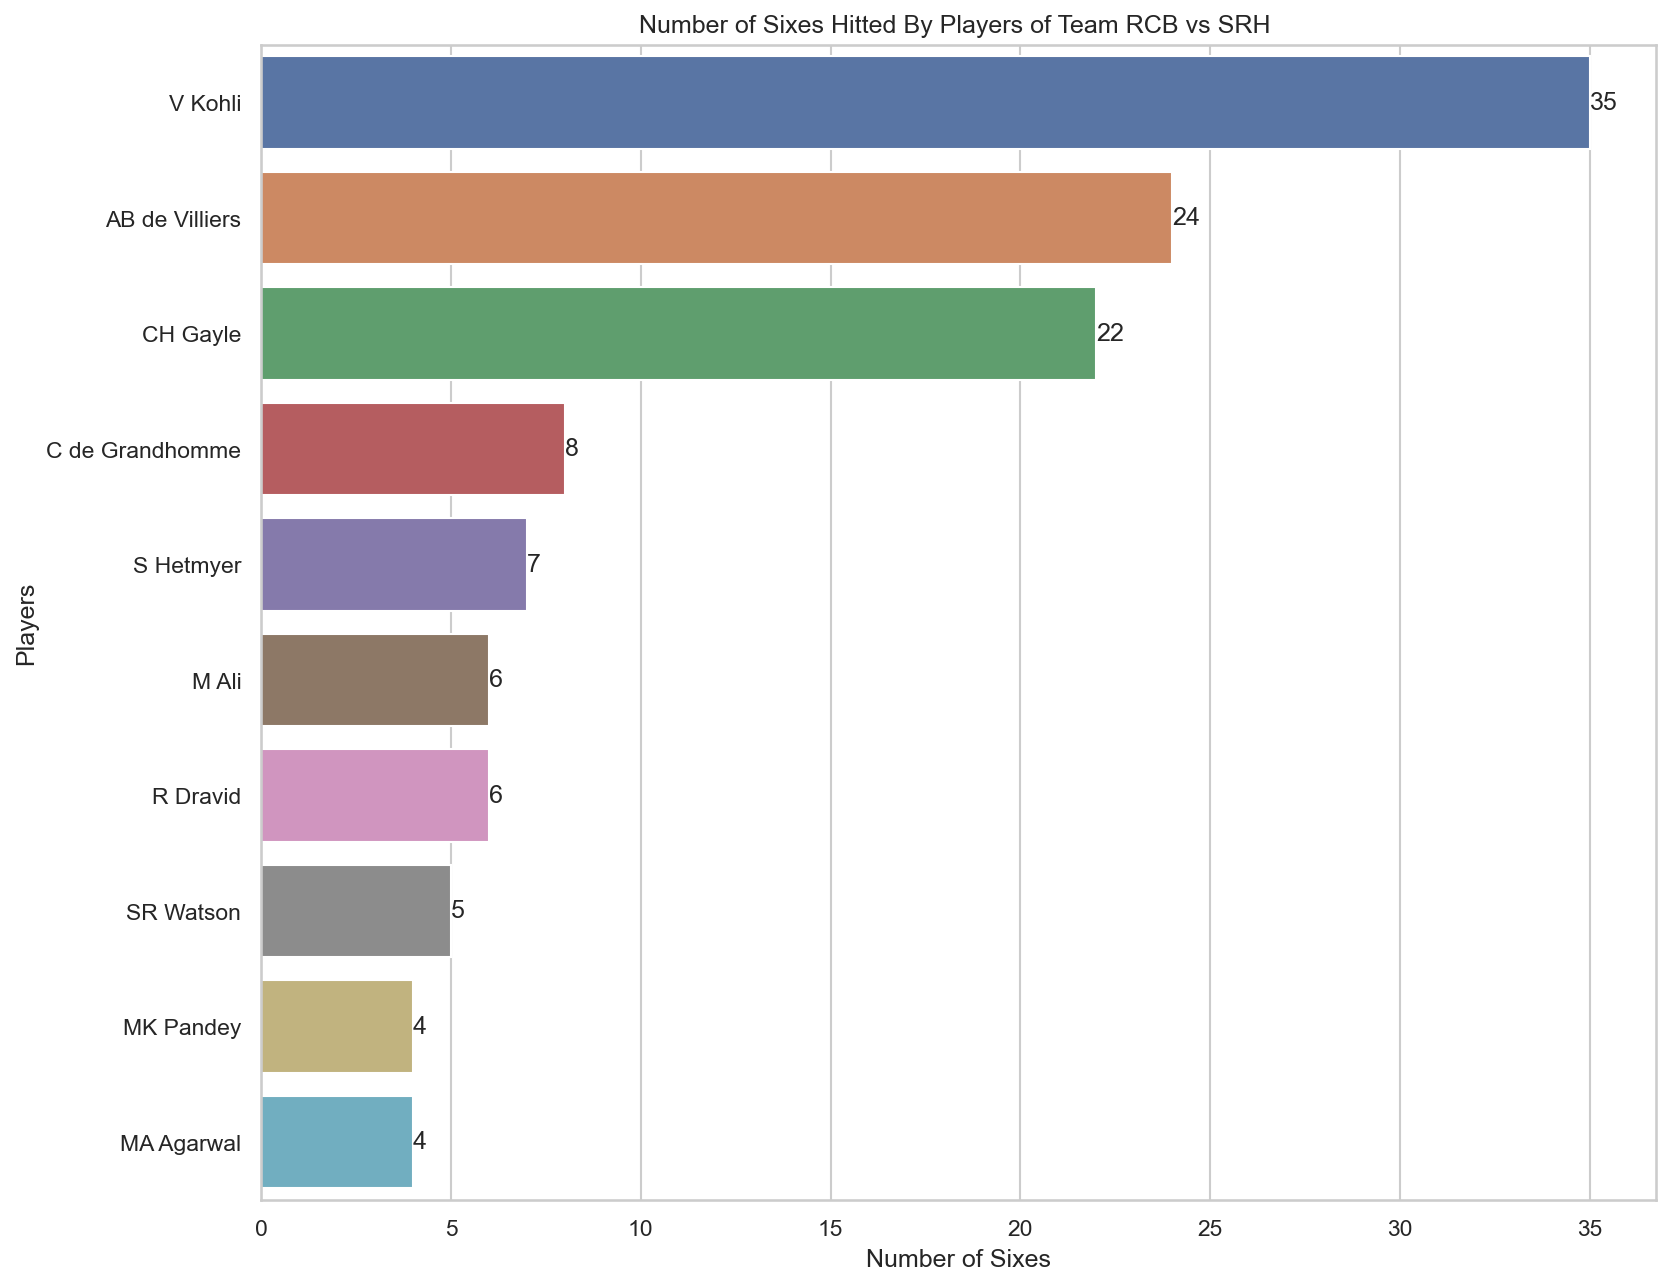

In [63]:
############# Team t2 (sixes)
fig = plt.figure(figsize=(12,10),dpi=150)
t1_player_six = total_del[(total_del['batting_team']==t2) & (total_del['total_runs']==6)]['batsman']
ax = sns.countplot(y=t1_player_six,order=t1_player_six.value_counts().iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.title(f"Number of Sixes Hitted By Players of Team {acr_t2} vs {acr_t1} ")
plt.ylabel('Players')
plt.xlabel('Number of Sixes')
plt.show();

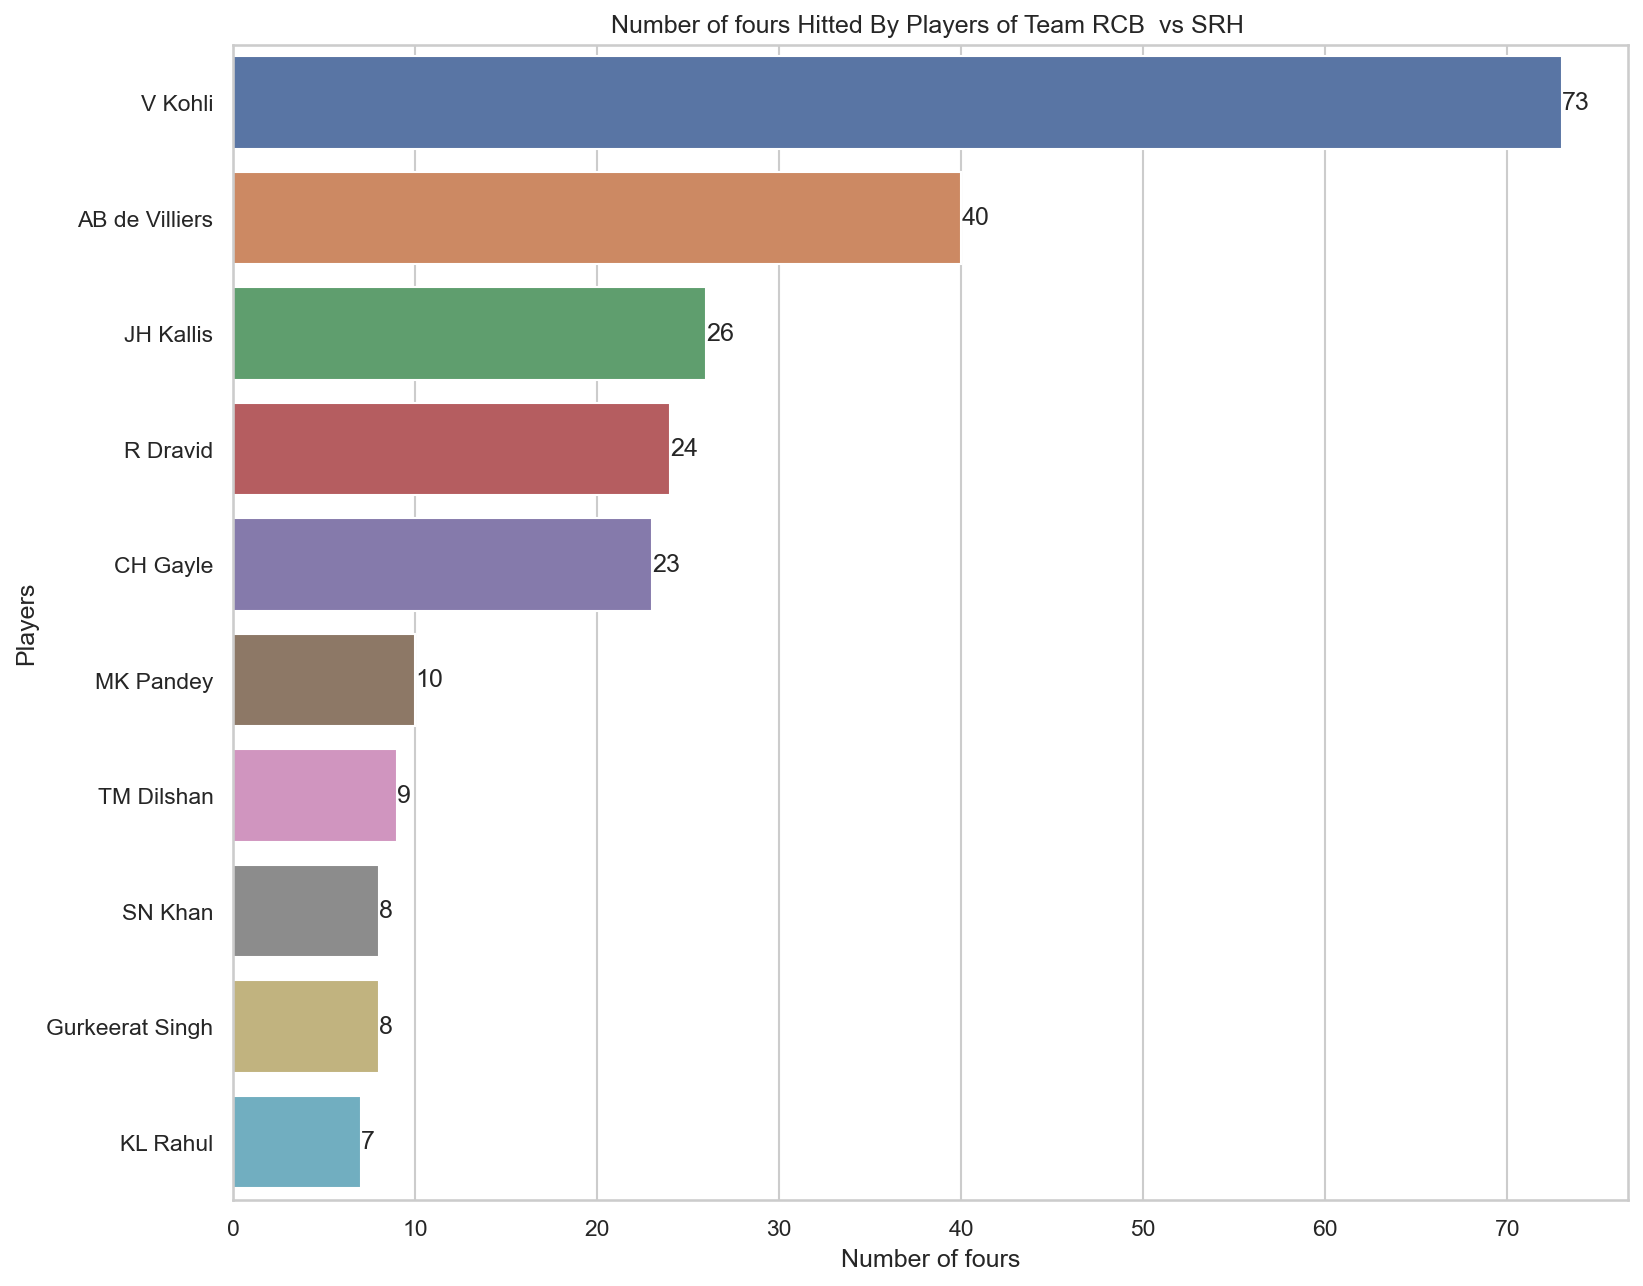

In [64]:
############# Team t2 (fours)
fig = plt.figure(figsize=(12,10),dpi=150)
t1_player_six = total_del[(total_del['batting_team']==t2) & (total_del['total_runs']==4)]['batsman']
ax = sns.countplot(y=t1_player_six,order=t1_player_six.value_counts().iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.title(f"Number of fours Hitted By Players of Team {acr_t2}  vs {acr_t1} ")
plt.ylabel('Players')
plt.xlabel('Number of fours')
plt.show();

## BATSMAN vs BOWLER

In [65]:
batsman = 'V Kohli'
bowler = 'JJ Bumrah'

In [136]:
deliveries['bowler'].unique().tolist().extend(deliveries['bowler'].unique().tolist())


In [142]:
a = [1,2,3]
b =  [4,5,6]

In [143]:
a.extend(b)
a

[1, 2, 3, 4, 5, 6]

In [66]:
head_to_head = deliveries[(deliveries['batsman']==batsman) & (deliveries['bowler']==bowler)]

In [67]:
head_to_head[['match_id','batting_team','bowling_team','over','batsman','non_striker','bowler','total_runs']]

,match_id,batting_team,bowling_team,over,batsman,non_striker,bowler,total_runs
2633,12,Royal Challengers Bangalore,Mumbai Indians,8,V Kohli,CH Gayle,JJ Bumrah,0
2634,12,Royal Challengers Bangalore,Mumbai Indians,8,V Kohli,CH Gayle,JJ Bumrah,0
2635,12,Royal Challengers Bangalore,Mumbai Indians,8,V Kohli,CH Gayle,JJ Bumrah,1
2637,12,Royal Challengers Bangalore,Mumbai Indians,8,V Kohli,CH Gayle,JJ Bumrah,0
2638,12,Royal Challengers Bangalore,Mumbai Indians,8,V Kohli,CH Gayle,JJ Bumrah,1
...,...,...,...,...,...,...,...,...
166347,11143,Royal Challengers Bangalore,Mumbai Indians,4,V Kohli,PA Patel,JJ Bumrah,4
166348,11143,Royal Challengers Bangalore,Mumbai Indians,4,V Kohli,PA Patel,JJ Bumrah,4
166349,11143,Royal Challengers Bangalore,Mumbai Indians,4,V Kohli,PA Patel,JJ Bumrah,4
166406,11143,Royal Challengers Bangalore,Mumbai Indians,14,V Kohli,AB de Villiers,JJ Bumrah,1


In [68]:
### Total Bowls
len(head_to_head)

73

In [69]:
### Total Overs Bowled
round((len(head_to_head)/6),1)

12.2

In [70]:
#### Total Runs
head_to_head['total_runs'].sum()

114

In [71]:
#### Total Six
head_to_head[head_to_head['batsman_runs']==6].count()[0]

4

In [72]:
#### Total Fours
head_to_head[head_to_head['batsman_runs']==4].count()[0]

13

In [73]:
#### Total Dot Balls
head_to_head[head_to_head['total_runs']==0].count()[0]

23

In [74]:
#### Total Wide Balls
head_to_head[head_to_head['wide_runs']>0].count()[0]

1

### PLAYER

In [75]:
player = 'V Kohli'

##### player as batsman

In [76]:
player_df = deliveries[deliveries['batsman']==player]
player_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [77]:
#### Runs Against Other Teams
player_df_latest = deliveries_latest[deliveries_latest['batsman']==player]
player_runs_against_teams = player_df_latest.groupby('bowling_team')['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
player_runs_against_teams

,bowling_team,total_runs
1,Delhi Capitals,857
6,Sunrisers Hyderabad,851
0,Chennai Super Kings,777
3,Kolkata Knight Riders,685
2,Kings XI Punjab,661
4,Mumbai Indians,652
5,Rajasthan Royals,382


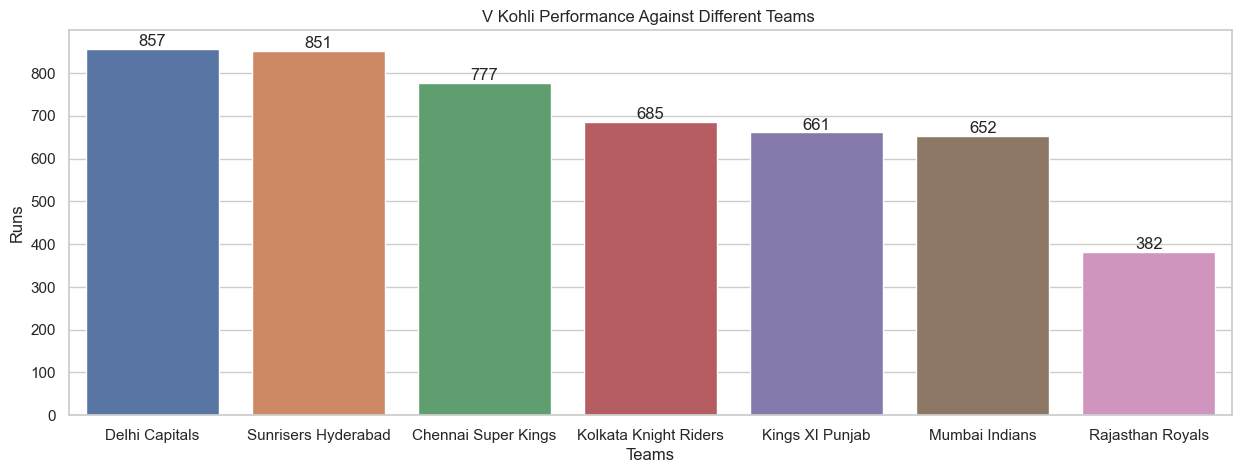

In [78]:
fig = plt.figure(figsize=(15,5))
ax = sns.barplot(data=player_runs_against_teams,x='bowling_team',y='total_runs')
ax.bar_label(ax.containers[0])
plt.title(f'{player} Performance Against Different Teams ')
plt.xlabel('Teams')
plt.ylabel('Runs')
plt.show()

In [79]:
#### Runs Against Different Bowlers
player_runs_against_bowlers = player_df.groupby('bowler')['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
player_runs_against_bowlers = player_runs_against_bowlers[:15]
player_runs_against_bowlers

,bowler,total_runs
3,A Mishra,167
151,R Ashwin,163
201,UT Yadav,144
47,DJ Bravo,134
146,PP Chawla,128
86,JJ Bumrah,114
158,RA Jadeja,109
55,DS Kulkarni,104
188,SP Narine,100
70,IK Pathan,93


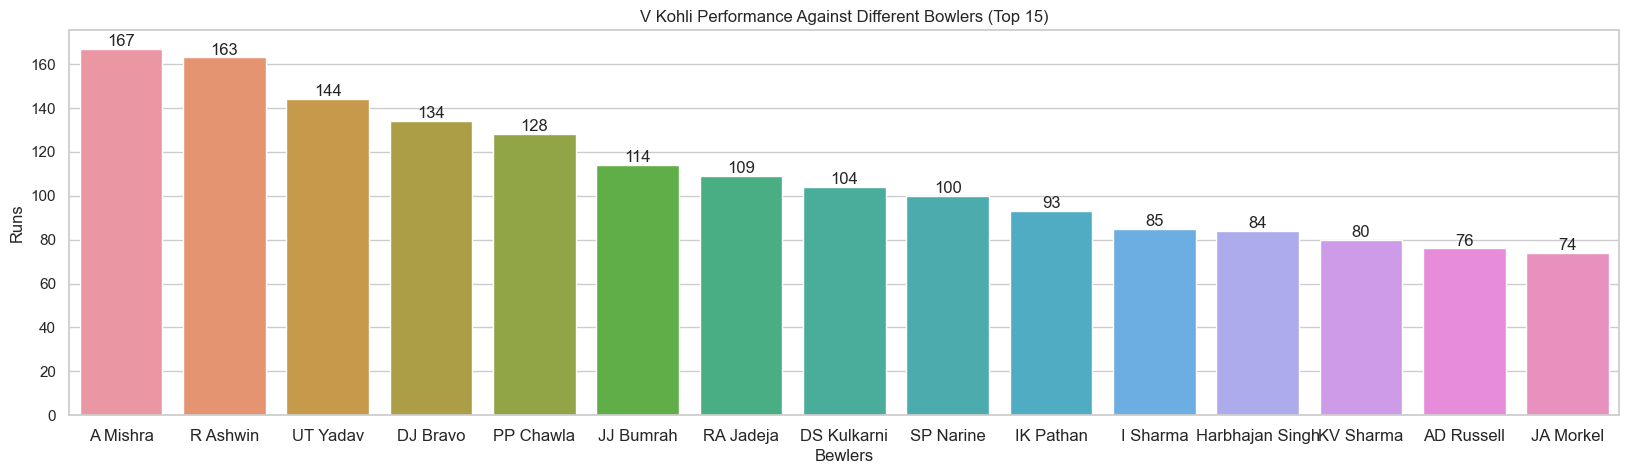

In [80]:
fig = plt.figure(figsize=(20,5))
ax = sns.barplot(data=player_runs_against_bowlers,x='bowler',y='total_runs')
ax.bar_label(ax.containers[0])
plt.title(f'{player} Performance Against Different Bowlers (Top 15)')
plt.xlabel('Bewlers')
plt.ylabel('Runs')
plt.xticks(fontsize=12)
plt.show()

In [81]:
### Partnership runs
player_partnership_runs = player_df.groupby('non_striker')['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
player_partnership_runs = player_partnership_runs[:15]
player_partnership_runs

,non_striker,total_runs
2,AB de Villiers,1396
9,CH Gayle,1185
43,PA Patel,301
23,KL Rahul,280
19,JH Kallis,195
59,SS Tiwary,162
33,MC Henriques,146
69,Yuvraj Singh,127
37,Mandeep Singh,126
44,Q de Kock,117


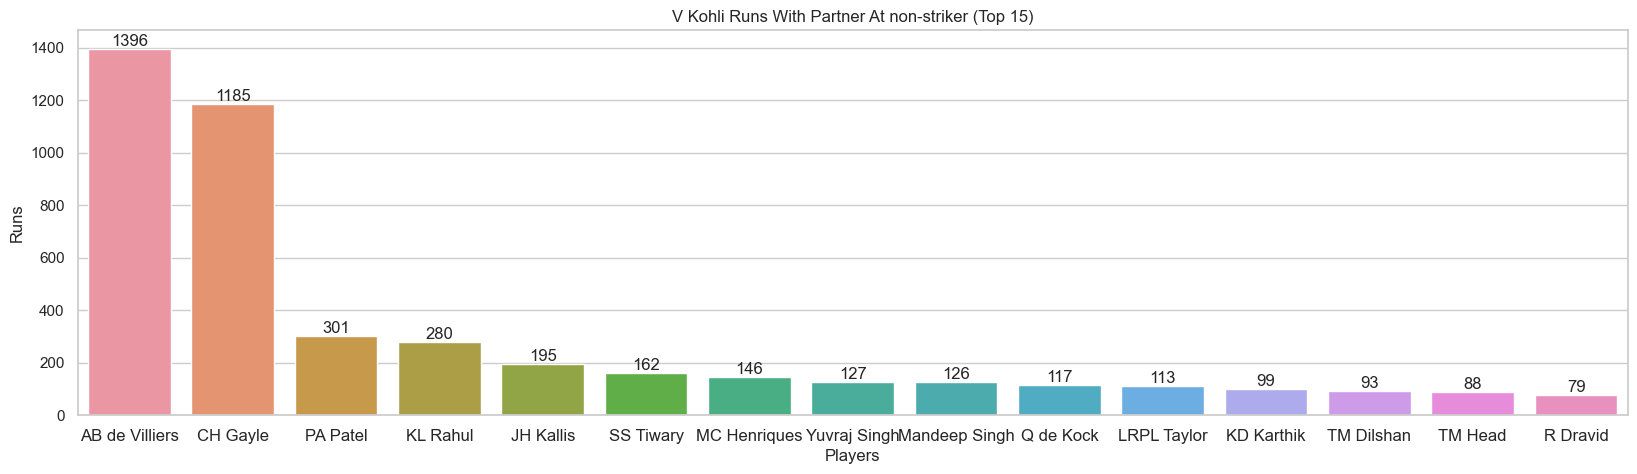

In [82]:
fig = plt.figure(figsize=(20,5))
ax = sns.barplot(data=player_partnership_runs,x='non_striker',y='total_runs')
ax.bar_label(ax.containers[0])
plt.title(f'{player} Runs With Partner At non-striker (Top 15)')
plt.xlabel('Players')
plt.ylabel('Runs')
plt.xticks(fontsize=12)
plt.show()

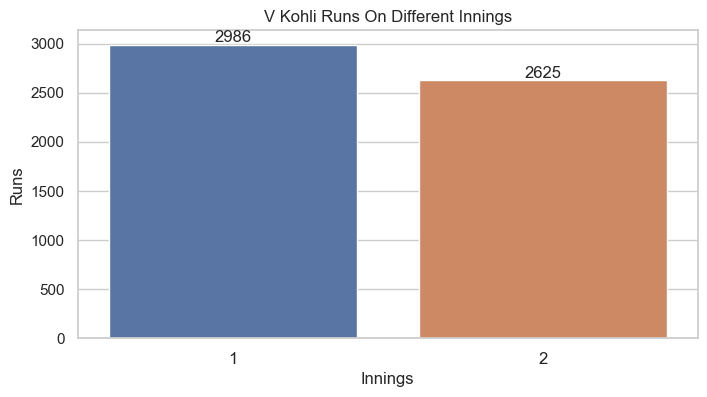

In [83]:
### Player Runs In Different Innings
fig = plt.figure(figsize=(8,4))
innings_runs = player_df[player_df['inning']<3]
innings = innings_runs.groupby('inning')['total_runs'].sum()
ax = sns.barplot(x=innings.index,y=innings.values)
ax.bar_label(ax.containers[0])
plt.title(f'{player} Runs On Different Innings')
plt.xlabel('Innings')
plt.ylabel('Runs')
plt.xticks(fontsize=12)
plt.show()

##### Player as bowler

In [84]:
player_df_bowl = deliveries[deliveries['bowler']==player]
player_df_bowl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
17708,76,1,Delhi Daredevils,Royal Challengers Bangalore,12,1,S Dhawan,G Gambhir,V Kohli,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
17709,76,1,Delhi Daredevils,Royal Challengers Bangalore,12,2,G Gambhir,S Dhawan,V Kohli,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
17710,76,1,Delhi Daredevils,Royal Challengers Bangalore,12,3,S Dhawan,G Gambhir,V Kohli,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
17711,76,1,Delhi Daredevils,Royal Challengers Bangalore,12,4,S Dhawan,G Gambhir,V Kohli,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
17712,76,1,Delhi Daredevils,Royal Challengers Bangalore,12,5,G Gambhir,S Dhawan,V Kohli,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [85]:
##### Total Runs Given
player_df_bowl['total_runs'].sum()

371

In [86]:
##### Runs Given Against Different Players
player_df_bowl_players = player_df_bowl.groupby('batsman')['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)[:15]

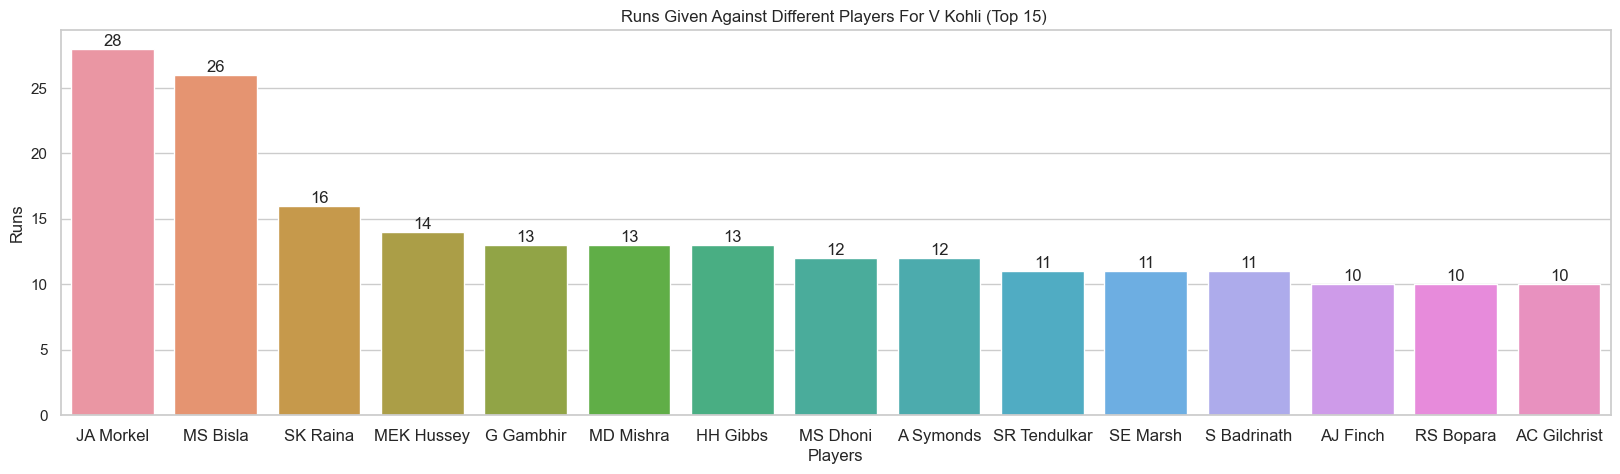

In [87]:
fig = plt.figure(figsize=(20,5))
ax = sns.barplot(data=player_df_bowl_players,x='batsman',y='total_runs')
ax.bar_label(ax.containers[0])
plt.title(f'Runs Given Against Different Players For {player} (Top 15) ')
plt.xlabel('Players')
plt.ylabel('Runs')
plt.xticks(fontsize=12)
plt.show()

In [88]:
#### Runs Given In Different Overs
player_df_bowl_overs = player_df_bowl.groupby('over')['total_runs'].sum().reset_index().sort_values(by='over',ascending=True)

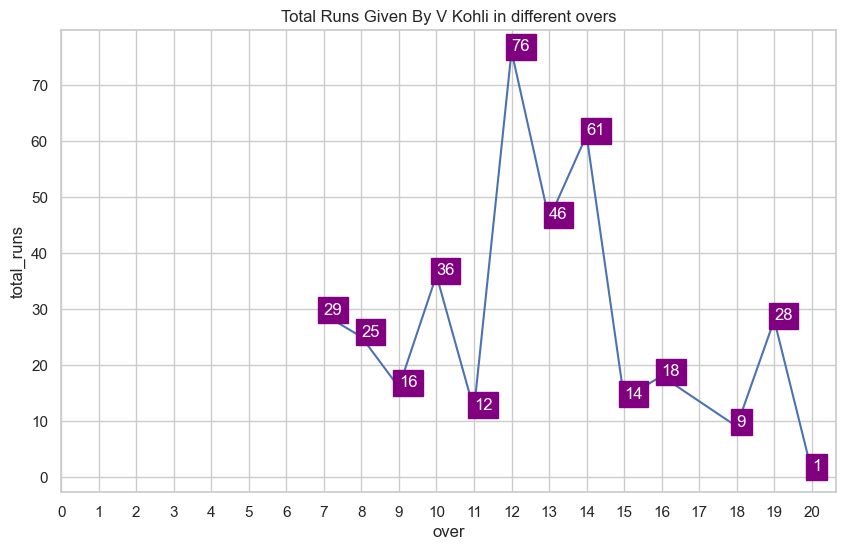

In [89]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(data=player_df_bowl_overs,x='over',y='total_runs',markers=True)
for x,y in zip(player_df_bowl_overs['over'],player_df_bowl_overs['total_runs']):
    plt.text(x = x, y = y, s = '{:.0f}'.format(y), color='white').set_backgroundcolor('purple')
ax.set_xticks(range(0,21,1))
ax.set_title(f'Total Runs Given By {player} in different overs');

In [90]:
##### Number of Times a Over is Balled By The Player
player_df_bowl_overs_n = player_df_bowl['over'].value_counts().reset_index()
player_df_bowl_overs_n = player_df_bowl_overs_n.rename(columns={'index':'over',"over":'count'})
player_df_bowl_overs_n = player_df_bowl_overs_n.sort_values(by='over')
player_df_bowl_overs_n['count'] = (player_df_bowl_overs_n['count']/6).round(2)

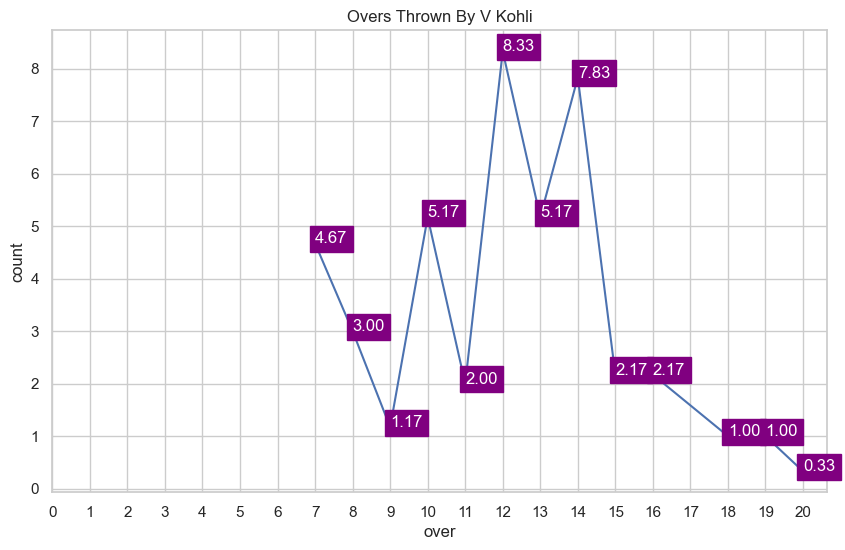

In [91]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(data=player_df_bowl_overs_n,x='over',y='count',markers=True)
for x,y in zip(player_df_bowl_overs_n['over'],player_df_bowl_overs_n['count']):
    plt.text(x = x, y = y, s = '{:.2f}'.format(y), color='white').set_backgroundcolor('purple')
ax.set_xticks(range(0,21,1))
ax.set_title(f'Overs Thrown By {player}');

In [92]:
### Runs Given Against Different Teams
player_df_bowl_n = deliveries_latest[deliveries_latest['bowler']==player]
player_df_bowl_teams = player_df_bowl_n.groupby('batting_team')['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)[:15]
player_df_bowl_teams

,batting_team,total_runs
0,Chennai Super Kings,101
6,Sunrisers Hyderabad,66
2,Kings XI Punjab,54
5,Rajasthan Royals,38
3,Kolkata Knight Riders,37
4,Mumbai Indians,25
1,Delhi Capitals,23


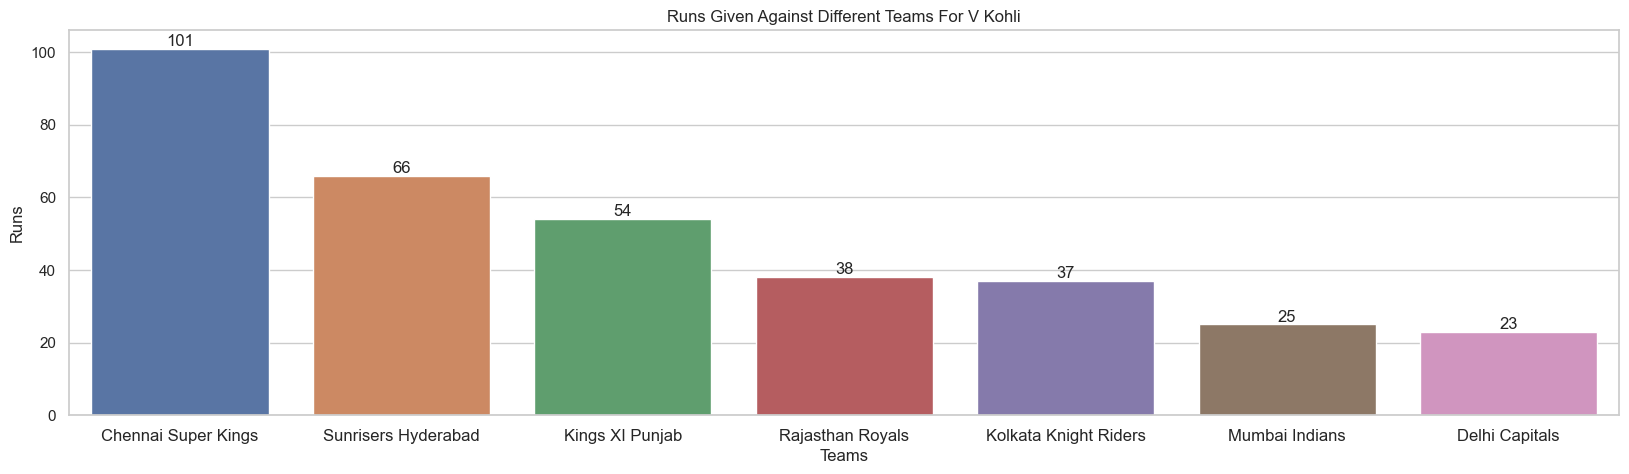

In [93]:
fig = plt.figure(figsize=(20,5))
ax = sns.barplot(data=player_df_bowl_teams,x='batting_team',y='total_runs')
ax.bar_label(ax.containers[0])
plt.title(f'Runs Given Against Different Teams For {player}')
plt.xlabel('Teams')
plt.ylabel('Runs')
plt.xticks(fontsize=12)
plt.show()

### Team

In [94]:
team = 'Chennai Super Kings'

In [95]:
#### Number of Matches Wins
m_w = matches_lt[matches_lt['winner']==team].count()[0]
m_w

95

In [96]:
#### Number of Toss Wins
t_w = matches_lt[matches_lt['toss_winner']==team].count()[0]
t_w

86

In [97]:
#### winning toss and match both
t_m_w = matches_lt[(matches_lt['toss_winner']==team) & (matches_lt['winner']==team )].count()[0]
t_m_w 

55

In [98]:
#### Chances of winning match if wins the toss
round(t_m_w/t_w*100,2)

63.95

In [99]:
deliveries_lt = deliveries_latest[deliveries_latest['batting_team']==team]
deliveries_lt.head(4)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14087,61,1,Chennai Super Kings,Kings XI Punjab,1,1,PA Patel,ML Hayden,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14088,61,1,Chennai Super Kings,Kings XI Punjab,1,2,PA Patel,ML Hayden,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14089,61,1,Chennai Super Kings,Kings XI Punjab,1,3,PA Patel,ML Hayden,B Lee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
14090,61,1,Chennai Super Kings,Kings XI Punjab,1,4,ML Hayden,PA Patel,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [100]:
#### Average Total Against Each Team
innings_data = deliveries_lt.groupby(['match_id','inning','bowling_team'])['total_runs'].sum().reset_index()
innings_data_scores = innings_data.groupby('bowling_team')['total_runs'].mean().round().astype(int)

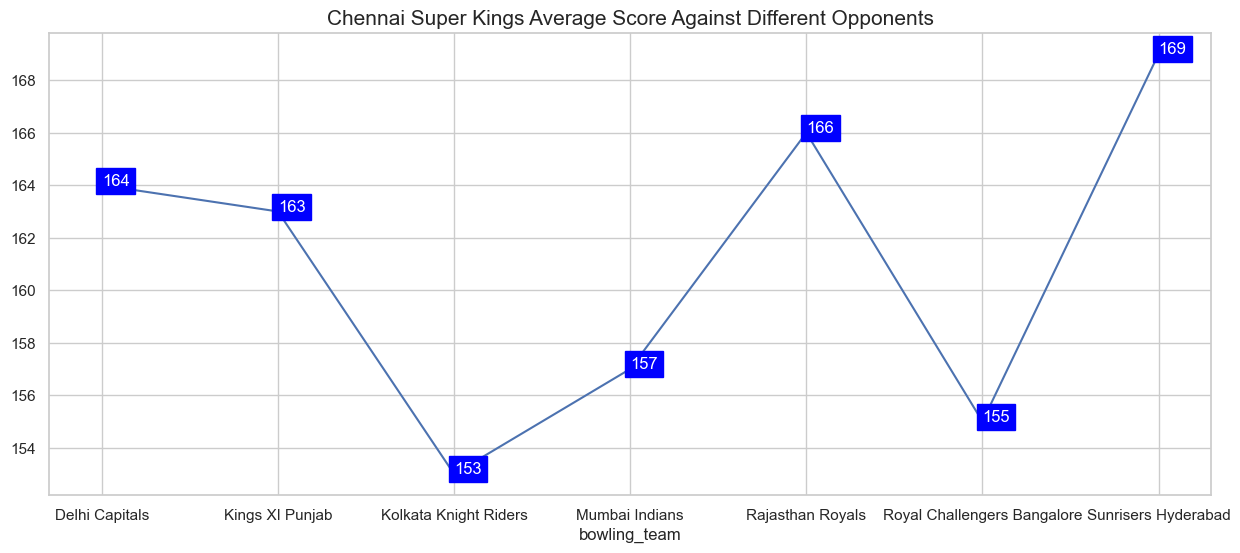

In [101]:
fig = plt.figure(figsize=(15,6))
ax = sns.lineplot(x=innings_data_scores.index,y=innings_data_scores.values,markers=True)
for x,y in zip(innings_data_scores.index,innings_data_scores.values):
    plt.text(x = x, y = y, s = '{:.0f}'.format(y), color='white').set_backgroundcolor('blue')
ax.set_xticks(range(0,7,1))
ax.set_title(f'{team} Average Score Against Different Opponents',fontdict=font);

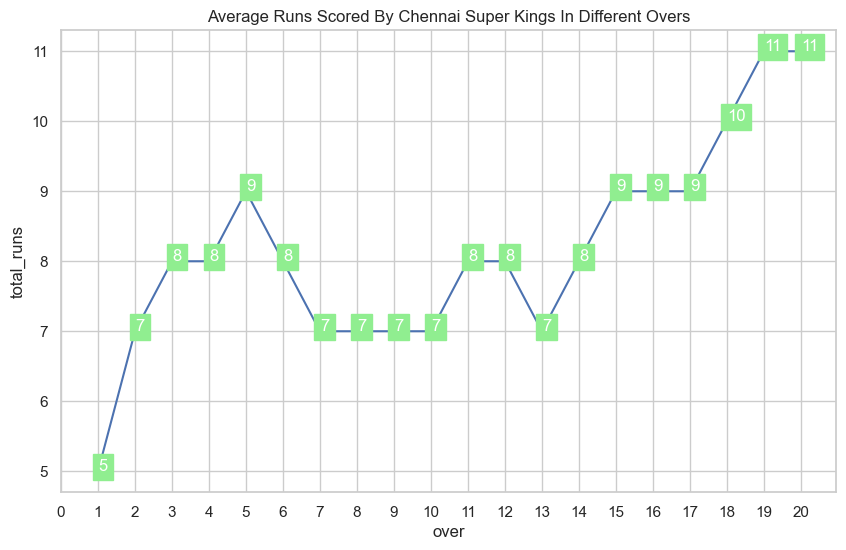

In [102]:
#### Average Runs Scored In Different Overs
team_over_data = (deliveries_lt.groupby('over')['total_runs'].mean()*6).round().astype(int).reset_index()
team_over_data

fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(data=team_over_data,x='over',y='total_runs',markers=True)
for x,y in zip(team_over_data['over'],team_over_data['total_runs']):
    plt.text(x = x, y = y, s = '{:.0f}'.format(y), color='white').set_backgroundcolor('lightgreen')
ax.set_xticks(range(0,21,1))
ax.set_title(f'Average Runs Scored By {team} In Different Overs');

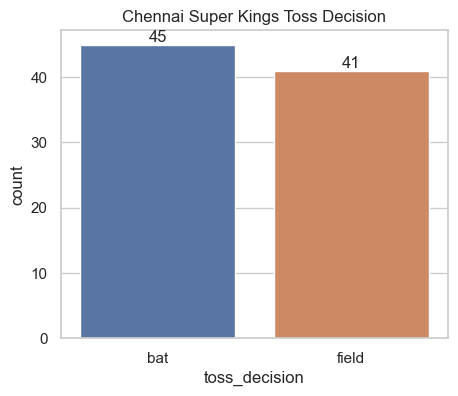

In [103]:
####### Toss Decision
fig = plt.figure(figsize=(5,4))
team_toss_decision = matches_lt[matches_lt['toss_winner']==team]['toss_decision']
ax=sns.countplot(team_toss_decision)
ax.bar_label(ax.containers[0])
ax.set_title(f'{team} Toss Decision');

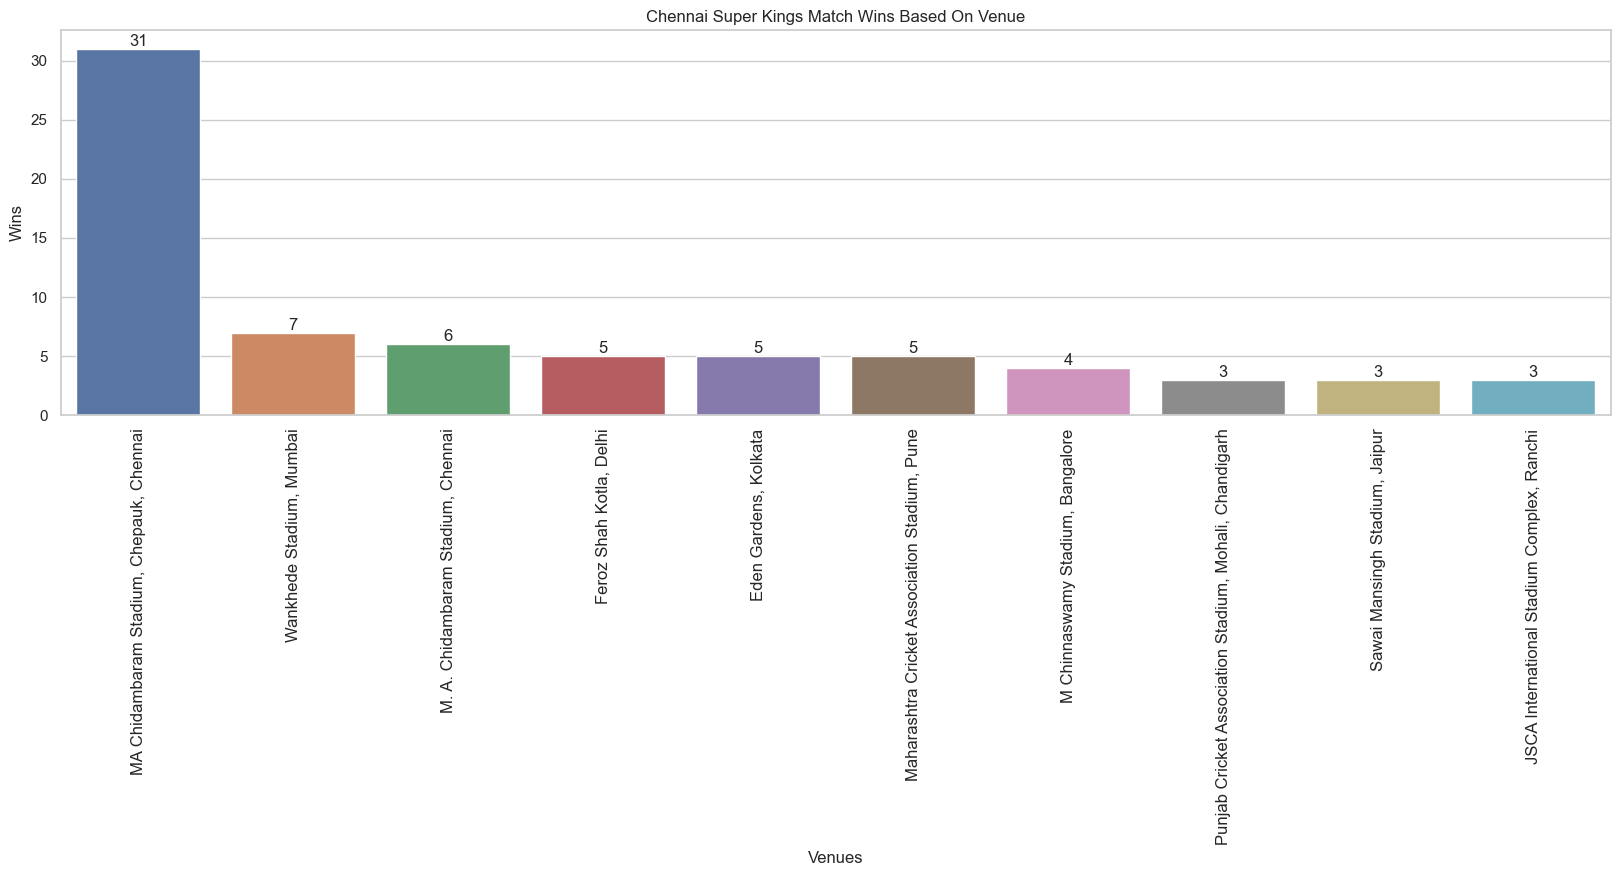

In [104]:
#### Most Win Based On Venue,City
venue_win = matches_lt[matches_lt['winner']==team]['venue'].value_counts()[:10]
venue_win

fig = plt.figure(figsize=(20,5))
ax = sns.barplot(x=venue_win.index,y=venue_win.values)
ax.bar_label(ax.containers[0])
plt.title(f'{team} Match Wins Based On Venue')
plt.xlabel('Venues')
plt.ylabel('Wins')
plt.xticks(fontsize=12,rotation='vertical')
plt.show()

In [105]:
deliveries_lt

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14087,61,1,Chennai Super Kings,Kings XI Punjab,1,1,PA Patel,ML Hayden,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14088,61,1,Chennai Super Kings,Kings XI Punjab,1,2,PA Patel,ML Hayden,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14089,61,1,Chennai Super Kings,Kings XI Punjab,1,3,PA Patel,ML Hayden,B Lee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
14090,61,1,Chennai Super Kings,Kings XI Punjab,1,4,ML Hayden,PA Patel,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14091,61,1,Chennai Super Kings,Kings XI Punjab,1,5,ML Hayden,PA Patel,B Lee,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


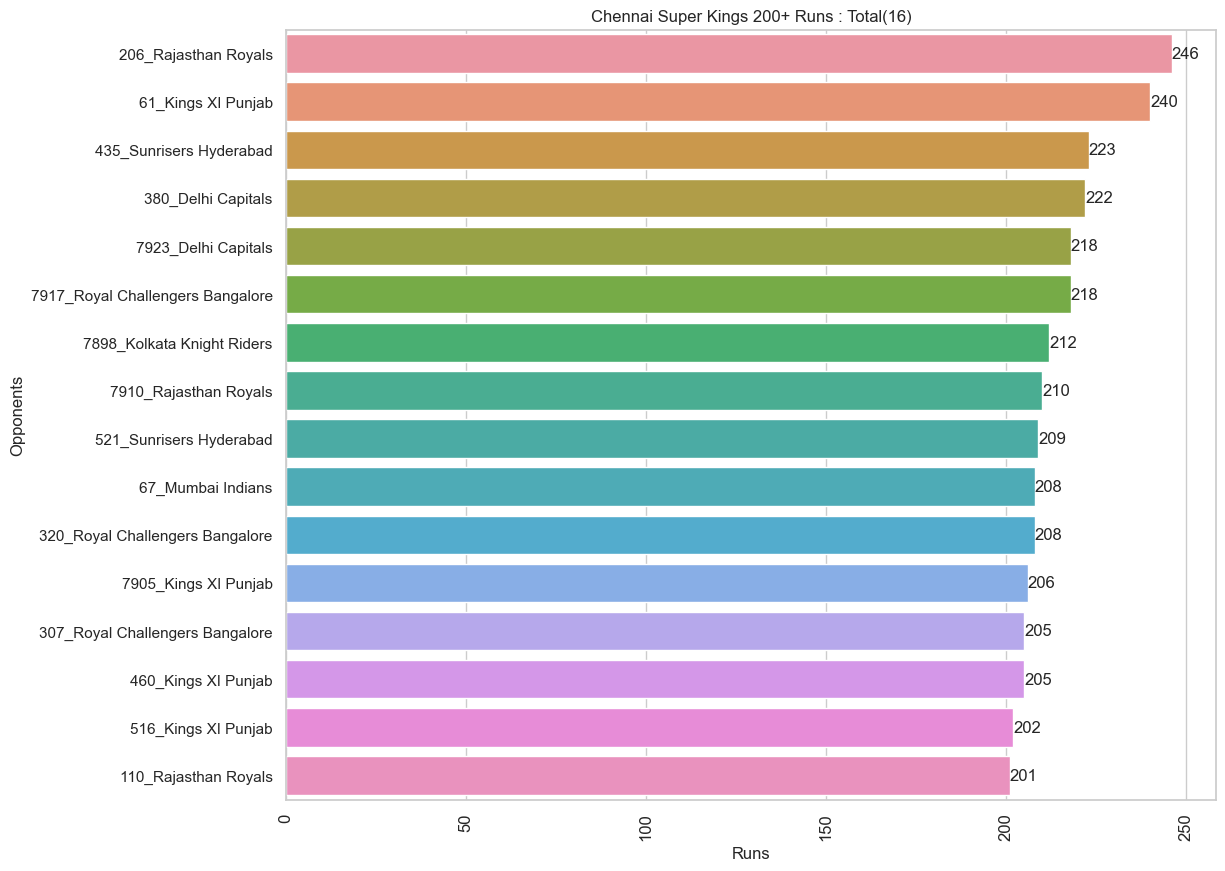

In [106]:
#### Top 10 Highest Runs
fig = plt.figure(figsize=(12,10))
team_runs_over_200_df = deliveries_lt.groupby(['match_id','bowling_team','inning'])['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
team_runs_over_200 = team_runs_over_200_df[team_runs_over_200_df['total_runs']>200]
team_runs_over_200['data'] = team_runs_over_200['match_id'].astype(str)+"_"+team_runs_over_200['bowling_team']
ax = sns.barplot(data=team_runs_over_200,y='data',x='total_runs')
ax.bar_label(ax.containers[0])
plt.title(f'{team} 200+ Runs : Total({len(team_runs_over_200)})')
plt.xlabel('Runs')
plt.ylabel('Opponents')
plt.xticks(fontsize=12,rotation='vertical')
plt.show();

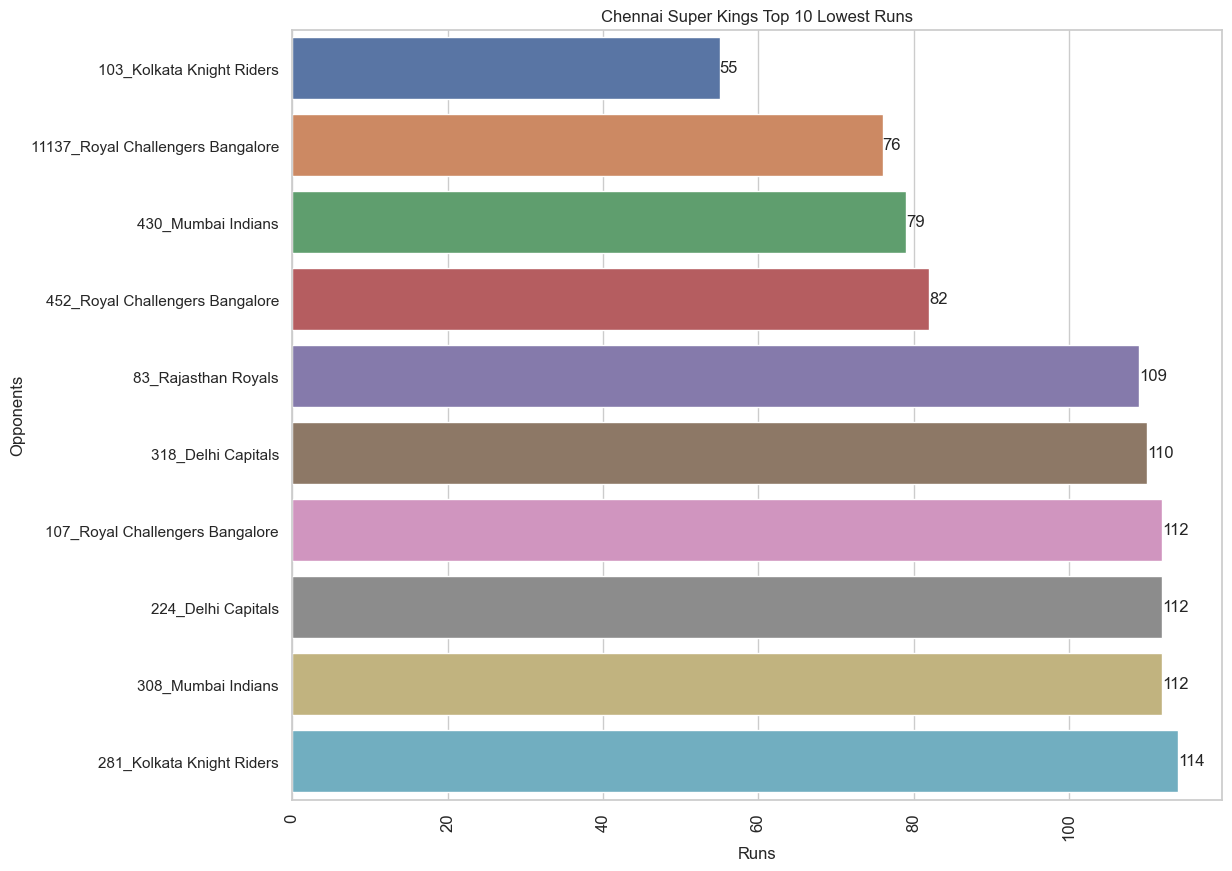

In [107]:
#### Top 10 Lowest Runs
fig = plt.figure(figsize=(12,10))
team_runs_over_df = deliveries_lt.groupby(['match_id','bowling_team','inning'])['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=True)
team_runs_over_df = team_runs_over_df[team_runs_over_df['inning']<3]
team_runs_over_df = team_runs_over_df[:10]


team_runs_over_df['data'] = team_runs_over_df['match_id'].astype(str)+"_"+team_runs_over_df['bowling_team']


ax = sns.barplot(data=team_runs_over_df,y='data',x='total_runs')
ax.bar_label(ax.containers[0])
plt.title(f'{team} Top 10 Lowest Runs')
plt.xlabel('Runs')
plt.ylabel('Opponents')
plt.xticks(fontsize=12,rotation='vertical')
plt.show();


In [108]:
#### Total Sixes
team_sixes = deliveries[deliveries['batting_team']==team]
sixes = team_sixes[team_sixes['total_runs']==6].count()[0]
sixes

972

In [109]:
#### Total Fours
team_four = deliveries[deliveries['batting_team']==team]
four = team_four[team_four['total_runs']==4].count()[0]
four

2215

In [110]:
#### Total Team Runs
deliveries[deliveries['batting_team']==team]['total_runs'].sum()

26418

In [111]:
#### Total Extra Runs Given
deliveries[deliveries['bowling_team']==team]['extra_runs'].sum()

1213

In [118]:

######### TEAM COLORS

dictt = {
    'MI': '#004BA0',
    'CSK': '#FFFF3C',
    'RCB': '#EC1C24',
    'SRH': '#FF822A',
    'DC': '#00008B',
    'KKR':'#2E0854',
    'KXIP': '#DCDDDF',
    'RR': '#DCDDDF' 
}

t1 = 'CSK'
for key in dictt.keys():
    t1 = t1.replace(key, dictt[key])
    t2 = t2.replace(key,dictt[key])
print(t1)

#FFFF3C


***

Jupyter Notebook Created By Abhay Parashar 

[**Medium**](https://abhayparashar31.medium.com/) | [**LinkedIN**](https://www.linkedin.com/in/abhayparashar31/) | [**GitHub**](https://github.com/abhayparashar31/)